#Практическое задание №1. Методы обучения нейросетевых моделей.



**Цель работы** - решение задач компьютерного зрения в системах управления с использованием предобученных моделей сверточных нейронных сетей из библиотеки PyTorch (см. https://pytorch.org/vision/stable/models.html).

*Преимущество* предобученных моделей - получение быстрого результата без погружения в детали реализации и выполнения трудоемкого процесса настройки на крупных библиотеках изображений.

Их *недостатоки* - возможны ограничения лицензий использования как на использованный при обучении набор данных, так и на сами коэффициенты из библиотеки и исходный код модели. Ещё одним недостатком является то, что такие весовые коэффицпенты расчитываются на публичных библиотеках изображений и зачастую могут оказаться нерелеванты решаемой задаче.

Последнюю проблему обычно решают с помощью набора приемов, известных в англоязычной литературе как "Transfer learning". Суть его состоит в использовании библиотечных коэффициентов и модели как базы для настройки новой модели.

Ниже будет проиллюстрировано решение задач классификации и донастройки модели с использованием библиотеки PyTorch.

##Инициализация преднастроенных нейросетевых моделей

In [1]:
from torchvision import models

###AlexNet



**AlexNet** - это сверточная нейронная сеть, разработанная в 2012 году именно для задачи классификации изображений. Основные характеристики AlexNet:

1.   Архитектура
  *   Первая сверточная нейронная сеть с очень глубокой архитектурой для своего времени.
  *   Состоит из 5 сверточных слоев и 3 полносвязных слоев.

2.   Функции
  *   Использует активацию *ReLU* (Rectified Linear Unit), что помогает ускорить обучение.
  *   Применяет слои нормализации по конкурентоспособности и слои дропаута, что способствует предотвращению переобучения.

AlexNet открыла путь к разработке более глубоких и сложных архитектур нейронных сетей и стала отправной точкой для последующих исследований в области глубокого обучения и компьютерного зрения.

In [2]:
alexNet = {
    # https://papers.nips.cc/paper/2012/hash/c399862d3b9d6b76c8436e924a68c45b-Abstract.html
    'model': models.alexnet(weights=models.AlexNet_Weights.DEFAULT),
    'weights': models.AlexNet_Weights.DEFAULT,
    'preprocess': models.AlexNet_Weights.DEFAULT.transforms(antialias=True),
    'output_layer': 'classifier',
    'in_features': lambda model: model.classifier[1].in_features
}

Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth
100%|██████████| 233M/233M [00:01<00:00, 162MB/s]


###ResNet-50




ResNet-50 (Residual Network с 50 слоями) - это ещё одна сверточная нейронная сеть, разработанная компанией Microsoft в 2015 году. Основным вкладом этой модели был предложенный ими концепт "остаточного обучения" (residual learning), который помог в справлении с проблемой затухания градиентов в глубоких нейронных сетях.

1.   Архитектура
  *   Глубокая архитектура с 50 слоями, включая сверточные и полносвязанные слои.
  *   Внедрение блоков "остаточного обучения" (residual blocks), где добавляется "соединение-остаток" (residual connection), позволяющее пропускать градиенты через слои без потери информации.

2.   Остаточное обучение
  *   Вместо того, чтобы обучаться представлению исходных данных, модель обучается разнице между входными данными и выходом слоя, что облегчает обучение глубоких сетей.

3.  Отличия от AlexNet
  *   Гораздо более глубокая архитектура в сравнении с AlexNet, что позволяет извлекать более сложные и абстрактные признаки.
  *   ResNet-50 демонстрирует более высокую точность классификации на современных задачах, благодаря своей глубокой и эффективной архитектуре.

In [3]:
resNet50 = {
    # https://arxiv.org/abs/1512.03385
    'model': models.resnet50(weights=models.ResNet50_Weights.DEFAULT),
    'weights': models.ResNet50_Weights.DEFAULT,
    'preprocess': models.ResNet50_Weights.DEFAULT.transforms(antialias=True),
    'output_layer': 'fc',
    'in_features': lambda model: model.fc.in_features
}

Downloading: "https://download.pytorch.org/models/resnet50-11ad3fa6.pth" to /root/.cache/torch/hub/checkpoints/resnet50-11ad3fa6.pth
100%|██████████| 97.8M/97.8M [00:02<00:00, 48.3MB/s]


###denseNet

**denseNet** (Densely Connected Convolutional Networks) - это ещё одна архитектура глубоких сверточных нейронных сетей, предложенная в 2017 году. Основной идеей DenseNet является плотное соединение (dense connection) между слоями, что позволяет каждому слою получать входные данные не только от предыдущего слоя, но и от всех предыдущих слоев в сети.

1.   Архитектура
  *   Сеть состоит из блоков, называемых "плотными блоками" (dense blocks), где каждый слой в блоке соединен со всеми предыдущими слоями.
  *   Включает переходные слои, которые уменьшают размерность передаваемых признаков.

2.   Плотные соединения
  *   Каждый слой получает входные данные от всех предыдущих слоев, что способствует обмену информацией между слоями и более эффективному использованию градиентов.

3.  Отличия от AlexNet и ResNet-50:
  *   В отличие от AlexNet и ResNet-50, где информация передается от одного слоя к другому, DenseNet использует плотные соединения для передачи информации между всеми слоями в блоке.
  *   Поддерживает более эффективное использование параметров благодаря общему использованию признаков между слоями.

In [4]:
denseNet = {
    # https://arxiv.org/abs/1608.06993
    'model': models.densenet201(weights=models.DenseNet201_Weights.DEFAULT),
    'weights': models.DenseNet201_Weights.DEFAULT,
    'preprocess': models.DenseNet201_Weights.DEFAULT.transforms(antialias=True),
    'output_layer': 'classifier',
    'in_features': lambda model: model.classifier[0].in_features
}

Downloading: "https://download.pytorch.org/models/densenet201-c1103571.pth" to /root/.cache/torch/hub/checkpoints/densenet201-c1103571.pth
100%|██████████| 77.4M/77.4M [00:00<00:00, 99.8MB/s]


###MobileNetV3_small





**MobileNetV3_small** - это вариант архитектуры MobileNetV3, который оптимизирован для работы на мобильных устройствах с ограниченными вычислительными ресурсами. MobileNetV3 был представлен компанией Google в 2019 году как следующее поколение в серии легких и эффективных сверточных нейронных сетей, предназначенных для использования на мобильных устройствах и встроенных системах.

1.   Архитектура
  *   Оптимизирована для мобильных устройств с ограниченными ресурсами.

2.  Отличия от предыдущих моделей
  *   MobileNetV3 был разработан специально для работы на мобильных устройствах, поэтому его архитектура оптимизирована для высокой эффективности и низкого потребления ресурсов.
  *   отличие от более тяжелых моделей, таких как ResNet-50 или DenseNet, MobileNetV3_small обеспечивает баланс между производительностью и легкостью.

In [5]:
mobileNetV3_small = {
    # https://arxiv.org/abs/1905.02244
    'model': models.mobilenet_v3_small(weights=models.mobilenetv3.MobileNet_V3_Small_Weights.DEFAULT),
    'weights': models.mobilenetv3.MobileNet_V3_Small_Weights.DEFAULT,
    'preprocess': models.mobilenetv3.MobileNet_V3_Small_Weights.DEFAULT.transforms(antialias=True),
    'output_layer': 'classifier',
    'in_features': lambda model: model.classifier[0].in_features
}

Downloading: "https://download.pytorch.org/models/mobilenet_v3_small-047dcff4.pth" to /root/.cache/torch/hub/checkpoints/mobilenet_v3_small-047dcff4.pth
100%|██████████| 9.83M/9.83M [00:00<00:00, 96.6MB/s]


###swinT


**swinT** - это новая модель нейронной сети, основанной на трансформерах, которая была разработана для распознавания изображений.

1.   Архитектура
  *   Использует архитектуру трансформера, которая способствует обработке изображений на основе множества патчей.
  *   Обладает масштабируемой архитектурой, которая обеспечивает эффективное обучение и предсказания на изображениях различной сложности.
  *   Глубокие зависимости: SwinT способна обнаруживать и использовать глубокие зависимости в изображениях благодаря механизму внимания трансформеров. Это позволяет ей эффективно извлекать высокоуровневые признаки из изображений.

2.  Отличия от предыдущих моделей
  *   Перечисленные архитектурные особенности делают SwinT одной из наиболее инновационных моделей нейронных сетей, способной решать широкий спектр задач в области обработки изображений, от классификации до сегментации и детекции объектов.

In [6]:
swinT = {
    # https://arxiv.org/abs/2103.14030
    'model': models.swin_t(weights=models.Swin_T_Weights.IMAGENET1K_V1.DEFAULT),
    'weights': models.Swin_T_Weights.IMAGENET1K_V1.DEFAULT,
    'preprocess': models.Swin_T_Weights.IMAGENET1K_V1.DEFAULT.transforms(antialias=True),
    'output_layer': 'head',
    'in_features': lambda model: model.head.in_features
}

Downloading: "https://download.pytorch.org/models/swin_t-704ceda3.pth" to /root/.cache/torch/hub/checkpoints/swin_t-704ceda3.pth
100%|██████████| 108M/108M [00:01<00:00, 85.1MB/s]


Далее необходимо определиться с вычислительной подсистемой (CPU или GPU).



In [7]:
#import torch
#
#gpu = 'has' if torch.cuda.is_available() else 'has no'
#print(f'Current environment {gpu} GPU support')
#device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
#!lscpu
#print(f'GPU count = {torch.cuda.device_count() if torch.cuda.is_available() else "0"}')
#
#for model in [resNet50, alexNet, denseNet, mobileNetV3_small, swinT]:
     #model['model'].to(device)
     #model['preprocess'].to(device)
     #model['model'].eval()

##Вспомогательные функции


In [8]:
import os
import time
import copy
import math
import statistics

import typing
from typing import Callable
from functools import partial

import numpy
import pandas
from pandas.core.arrays import boolean
import matplotlib
import matplotlib.pyplot as plt
from requests import get

from torch import Tensor, nn
from torch.utils.data import DataLoader, Dataset
from torchvision.transforms import ToPILImage, Compose, Resize, CenterCrop
from torchvision.io import read_image

In [9]:
strip_chars = ' \t'
tmp_file_name = 'tmp_file_name_for_image_download'

to_image = ToPILImage()

Функция *classify* - является задачей классификации. Иными словами представляет собой инструмент для визуализации изображений и их классификаций с использованием предварительно обученной модели.

In [10]:
def classify(dataset: Dataset, # объект Dataset, содержащий изображения
                preprocess: typing.Callable[[Tensor],Tensor], # функция для предварительной обработки изображения перед подачей его на вход модели.
                num_per_row: int, single_size: float,         # количество изображений, отображаемых в одной строке; размер изображений
                labels: typing.List[str],                     # список меток классов для изображений в dataset
                model_labels: typing.List[str] = None,        # список меток классов для модели
                model: typing.Callable[[Tensor], Tensor] = None, # модель, используемая для классификации изображений
                debug: typing.Any = False,                    # флаг
                num_of_classes: int = 1,                      # количество классов (по умолчанию 1).
                vspace: float = 0.3                           # пространство между изображениями в выводе
             ) -> None:
    num = len(dataset)

    # Создаем график с подзаголовками для каждого изображения
    fig, axs = plt.subplots(math.ceil(num/num_per_row), num_per_row, figsize=(
        single_size*num_per_row, (single_size + vspace)*(math.ceil(num/num_per_row))),
        sharex=True, sharey=True)

    for i in range(0, len(dataset)):
        try:
            # Загружаем изображение и его метку
            image, label = dataset[i]
            pred = None

            # Если предоставлена model и метки для модели model_labels,
            # то модель используется для получения предсказания
            if model is not None and model_labels is not None:
                start_time = time.perf_counter()
                score = model(image.unsqueeze(0)).detach().squeeze(0).softmax(0)
                pred_index = numpy.flip(score.detach().cpu().argsort().numpy())[0]
                end_time = time.perf_counter()
                #print(end_time - start_time) # 22 639 885
                # Покажет время, процент и то, что угадало
                pred = f'Detector: {(end_time - start_time):.3f}s\n{model_labels[pred_index]}[{score[pred_index].item()*100:.0f}%]'

            loc_fig = axs[i//num_per_row, i % num_per_row]
            loc_fig.imshow(to_image(preprocess(image)))
            title =f'\nActual: {labels[label]}[{label}]\n{pred}'
            loc_fig.title.set_text(title)
        except Exception as ex:
            if debug:
                raise ex
            print(f'Image {i} is failed to load: {str(ex)}')

    fig.subplots_adjust(wspace=0.3)
    plt.show()

*denormalize* - функция, осуществляющая масштабирование изображений.

In [11]:
def denormalize(dataset: Dataset, trans: typing.Any) -> Callable[[Tensor], Tensor]:
    image, label = dataset[0]
    std = torch.as_tensor(trans.std, dtype=image.dtype, device=image.device).view(-1, 1, 1)
    mean = torch.as_tensor(trans.mean, dtype=image.dtype, device=image.device).view(-1, 1, 1)
    return lambda img: img*std + mean


*UrlDataset* - предназначен для создания датасета изображений на основе данных, предоставляемых в CSV-файле, в котором каждая строка содержит URL изображения и соответствующую метку.

In [12]:
import torch

In [13]:
from torchvision.io import read_image, ImageReadMode

class UrlDataset(Dataset):

    def __init__(self, file: str, to_device, transform = None) -> None:
        self.file = file
        self.transform = transform
        self.dataset = pandas.read_csv(file, sep=';')
        self.classes = self.dataset['label'].unique()
        self.classes.sort()
        self.class_to_index = {self.classes[i] : i for i in range(len(self.classes))}
        self.device = to_device

    def __len__(self) -> int:
        return len(self.dataset)

    def __getitem__(self, index: int) -> typing.Tuple[torch.Tensor, str]:
        url = self.dataset.iloc[index]['url'].strip(strip_chars)
        with open(tmp_file_name, 'wb') as file:
            file.write(get(url).content)

        #image = read_image(tmp_file_name).to(self.device)
        #test_image = read_image(test_image_path, mode=ImageReadMode.RGB)
        image = read_image(tmp_file_name, mode = ImageReadMode.RGB).to(self.device)
        label = self.class_to_index[self.dataset.iloc[index]['label']]
        if self.transform:
            return self.transform(image), label
        return image, label


*train_model* - функция обучения с использованием переданных ей параметров.

In [14]:
def train_model(model,                   # модель, кот хотим обучить
                dataloader: DataLoader,  # загрузчик данных
                device: torch.device,    # CPU или GPU
                critery,                 # функция потерь, исп. для оценки ошибки модели
                optimizer,               # оптимизатор, исп. для обновления параметров модели
                scheduler,               # шаг обучения
                num_epochs = 25):        # количество эпох обучения
    since = time.time()

    best_model_wts = copy.deepcopy(model.state_dict())
    best_loss = 0.0
    best_epoch = -1

    process = {'train': {'loss': [], 'accuracy': []}, 'validate': {'loss': [], 'accuracy': []}}

    for epoch in range(num_epochs):
        print(f'Epoch {epoch}/{num_epochs - 1}')
        print('-' * 10)
        epoch_loss = 0.0
        epoch_acc = 0.0
        for item in dataloader:
            if item['train'] == True:
                model.train()
            else:
                to_labels_ep = [] # изм. для conf m
                preds_ep = []     # изм. для conf m
                model.eval()
            running_loss = 0.0
            running_corrects = 0
            dataset_size = 0
            for inputs, labels in item['loader']:
                dataset_size = dataset_size + 1
                inputs = inputs.to(device)
                labels = labels.to(device)
                if item['train'] == False: # изм. для conf m
                    to_labels_ep.extend(labels.cpu().numpy().tolist()) # изм. для conf m
                optimizer.zero_grad()
                with torch.set_grad_enabled(item['train'] == True):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    if item['train'] == False: # изм. для conf m
                        preds_ep.extend(preds.cpu().numpy().tolist()) # изм. для conf m
                    loss = critery(outputs, labels)
                    if item['train'] == True:
                        loss.backward()
                        optimizer.step()
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)
            if item['train'] == True:
                scheduler.step()

            epoch_loss = running_loss / dataset_size
            epoch_acc = running_corrects.detach().cpu().double() / dataset_size

            if item['train'] == True:
                ptype = 'train'
            else:
                ptype = 'validate'

            process[ptype]['loss'].append(epoch_loss)
            process[ptype]['accuracy'].append(epoch_acc)

            print(f'[{epoch}][train={item["train"]}] Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')

            # deep copy the model
            if item['train'] == True and 1/epoch_loss > best_loss:
                best_loss = 1/epoch_loss
                best_model_wts = copy.deepcopy(model.state_dict())
                best_epoch = epoch

        print()

    time_elapsed = time.time() - since
    print(f'Training complete in {time_elapsed // 60:.0f}m {time_elapsed % 60:.0f}s')
    print(f'Best val loss: {1/best_loss:4f} at epoch {best_epoch}')

    # load best model weights
    model.load_state_dict(best_model_wts)
    return model, process, to_labels_ep, preds_ep

##Подготовка датасета для донастройки модели


Вариант задания: **П и Т-образное оперение**

Предположим, что необходимло разработать систему,
которая способна распозновать беспилотники различных видов: условно вражеские с Т-образным оперением и отчественные с П-образным оперением *(рис. 1 - T-tail и high boom tail или n-tail)*. Одной из подсистем в таком случае будет система компьютерного зрения, которая должна будет определять, какой объект находится перед высокоточной камерой и последствии поражать цель!

Для донастройки библиотечных моделей первым дело необходимо сформировать два датасета, один для настройки выходных слоев нейронной сети, другой - для валидации новой модели (проверки её качества). В обоих случаях датасет помимо самих изображений должен содержать метки классов, к которым эти изображения относятся.



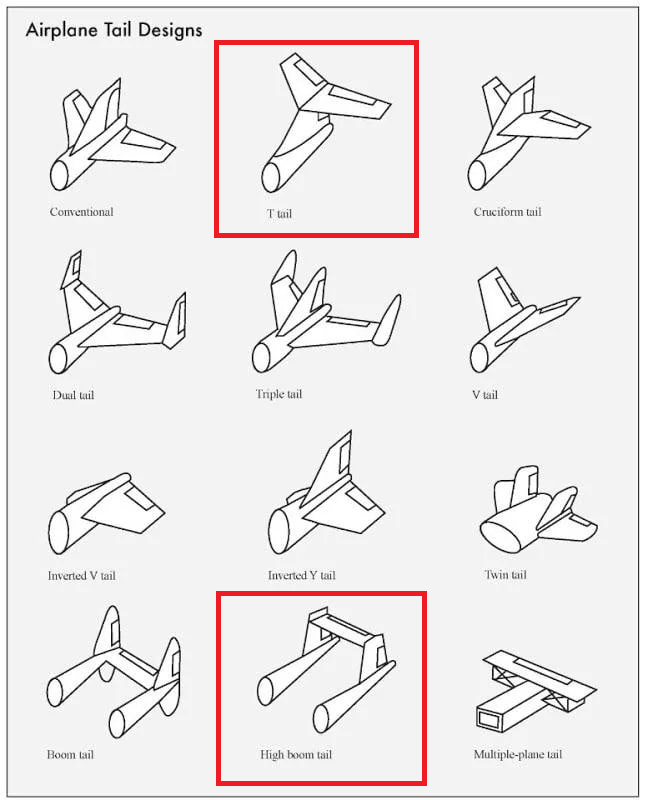

Рисунок 1 - Т- и П-образные оперения (сверху и снизу соответственно)

Прежде чем непосредственно перейти к созданию датасета, отмечу, что изначально датасет составлял более **70** фотографий **каждого** оперения с разного ракурса. В последствии при проявлении на двухмерную проекций точек пространства признаков оказалось, что метод редукции размерности на основе метода линейного PCA (Principial Component Analysis) **неприменим**.

Иными словами, данные были сильно перемешаны и возникала необходимость применения более сложных нелинейных методов. Длительное изучение возможности применения нелинейных методов не дало результата и было принято решение пойти по пути наименьшего сопротивления.

Примитивное решение этой проблемы - использование фотографий оперений приблизительно с одного и того же ракурса: с кормы воздушного средства.

Конечно, в действительности при разработке системы уничтожения вражеских БПЛА потребуется огромный датасет и более сложный подход к переобучению.

In [15]:
%%writefile train.csv
label;url
t-tail;https://github.com/nickolai-vvv/neuro-practice/blob/main/t-tail/1.png?raw=true
t-tail;https://github.com/nickolai-vvv/neuro-practice/blob/main/t-tail/2.png?raw=true
t-tail;https://github.com/nickolai-vvv/neuro-practice/blob/main/t-tail/3.png?raw=true
t-tail;https://github.com/nickolai-vvv/neuro-practice/blob/main/t-tail/4.png?raw=true
t-tail;https://github.com/nickolai-vvv/neuro-practice/blob/main/t-tail/5.png?raw=true
t-tail;https://github.com/nickolai-vvv/neuro-practice/blob/main/t-tail/6.png?raw=true
t-tail;https://github.com/nickolai-vvv/neuro-practice/blob/main/t-tail/7.png?raw=true
t-tail;https://github.com/nickolai-vvv/neuro-practice/blob/main/t-tail/8.png?raw=true
t-tail;https://github.com/nickolai-vvv/neuro-practice/blob/main/t-tail/9.png?raw=true
t-tail;https://github.com/nickolai-vvv/neuro-practice/blob/main/t-tail/10.png?raw=true
t-tail;https://github.com/nickolai-vvv/neuro-practice/blob/main/t-tail/11.png?raw=true
t-tail;https://github.com/nickolai-vvv/neuro-practice/blob/main/t-tail/12.png?raw=true
t-tail;https://github.com/nickolai-vvv/neuro-practice/blob/main/t-tail/13.png?raw=true
t-tail;https://github.com/nickolai-vvv/neuro-practice/blob/main/t-tail/14.png?raw=true
t-tail;https://github.com/nickolai-vvv/neuro-practice/blob/main/t-tail/15.png?raw=true
t-tail;https://github.com/nickolai-vvv/neuro-practice/blob/main/t-tail/16.png?raw=true
t-tail;https://github.com/nickolai-vvv/neuro-practice/blob/main/t-tail/17.png?raw=true
t-tail;https://github.com/nickolai-vvv/neuro-practice/blob/main/t-tail/18.png?raw=true
t-tail;https://github.com/nickolai-vvv/neuro-practice/blob/main/t-tail/19.png?raw=true
t-tail;https://github.com/nickolai-vvv/neuro-practice/blob/main/t-tail/20.png?raw=true

n-tail;https://github.com/nickolai-vvv/neuro-practice/blob/main/n-tail/1.png?raw=true
n-tail;https://github.com/nickolai-vvv/neuro-practice/blob/main/n-tail/2.png?raw=true
n-tail;https://github.com/nickolai-vvv/neuro-practice/blob/main/n-tail/3.png?raw=true
n-tail;https://github.com/nickolai-vvv/neuro-practice/blob/main/n-tail/4.png?raw=true
n-tail;https://github.com/nickolai-vvv/neuro-practice/blob/main/n-tail/5.png?raw=true
n-tail;https://github.com/nickolai-vvv/neuro-practice/blob/main/n-tail/6.png?raw=true
n-tail;https://github.com/nickolai-vvv/neuro-practice/blob/main/n-tail/7.png?raw=true
n-tail;https://github.com/nickolai-vvv/neuro-practice/blob/main/n-tail/8.png?raw=true
n-tail;https://github.com/nickolai-vvv/neuro-practice/blob/main/n-tail/9.png?raw=true
n-tail;https://github.com/nickolai-vvv/neuro-practice/blob/main/n-tail/10.png?raw=true
n-tail;https://github.com/nickolai-vvv/neuro-practice/blob/main/n-tail/11.png?raw=true
n-tail;https://github.com/nickolai-vvv/neuro-practice/blob/main/n-tail/12.png?raw=true
n-tail;https://github.com/nickolai-vvv/neuro-practice/blob/main/n-tail/13.png?raw=true
n-tail;https://github.com/nickolai-vvv/neuro-practice/blob/main/n-tail/14.png?raw=true
n-tail;https://github.com/nickolai-vvv/neuro-practice/blob/main/n-tail/15.png?raw=true
n-tail;https://github.com/nickolai-vvv/neuro-practice/blob/main/n-tail/16.png?raw=true
n-tail;https://github.com/nickolai-vvv/neuro-practice/blob/main/n-tail/17.png?raw=true
n-tail;https://github.com/nickolai-vvv/neuro-practice/blob/main/n-tail/18.png?raw=true
n-tail;https://github.com/nickolai-vvv/neuro-practice/blob/main/n-tail/19.png?raw=true
n-tail;https://github.com/nickolai-vvv/neuro-practice/blob/main/n-tail/20.png?raw=true

Writing train.csv


In [16]:
%%writefile validate.csv
label;url
t-tail;https://github.com/nickolai-vvv/neuro-practice/blob/main/t-tail/21.png?raw=true
t-tail;https://github.com/nickolai-vvv/neuro-practice/blob/main/t-tail/22.png?raw=true
t-tail;https://github.com/nickolai-vvv/neuro-practice/blob/main/t-tail/23.png?raw=true
t-tail;https://github.com/nickolai-vvv/neuro-practice/blob/main/t-tail/24.png?raw=true
t-tail;https://github.com/nickolai-vvv/neuro-practice/blob/main/t-tail/25.png?raw=true

n-tail;https://github.com/nickolai-vvv/neuro-practice/blob/main/n-tail/21.png?raw=true
n-tail;https://github.com/nickolai-vvv/neuro-practice/blob/main/n-tail/22.png?raw=true
n-tail;https://github.com/nickolai-vvv/neuro-practice/blob/main/n-tail/23.png?raw=true
n-tail;https://github.com/nickolai-vvv/neuro-practice/blob/main/n-tail/24.png?raw=true
n-tail;https://github.com/nickolai-vvv/neuro-practice/blob/main/n-tail/25.png?raw=true

Writing validate.csv


Датасет в библиогтеки PyTorch представлен базовым классом Dataset, описывающий способ загрузки и трансформации набора данных по запросу. Начнем с описания процесса "подгрузки" изображений по url и лэйблу из CSV-файла с описанием датасета.

После подготовки класса со сценарием загрузки изображений, его можно проверить путем визуализации с помощью библиотеки Matplotlib.



In [17]:
def getResult(model):
  device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
  model['model'].to(device)

  transform = model['preprocess']
  train = UrlDataset("train.csv", device, transform)
  validate  = UrlDataset('validate.csv', device, transform)

  num_per_row = 5
  single_size = 3.5
  vspace = 0.3

  print('╔' + '═'*104 + '╗')
  #print(f'║\tModel: { }' + '\t'*10 + ' ║')
  print(f'║\tModel: ' + '{:<89}'.format(model["model"].__class__.__name__) + ' ║')
  print(f'║\tNumber of parameters: {sum(item.numel() for item in model["model"].parameters())}' + '\t'*9 + ' ║')


  print('╚' + '═'*44  + '╣ Train dataset ╠' + '═'*43 + '╝')
  classify(train, denormalize(train, transform), num_per_row=num_per_row, single_size=single_size, vspace=vspace,
              labels = train.classes, model=model['model'], model_labels=model['weights'].meta["categories"])
  #print('╠' + '═'*44  + '╣ validate  dataset ╠' + '═'*43 + '╣')
  print('═'*43  + '╣ Validate  dataset ╠' + '═'*42)
  classify(validate, denormalize(validate, transform), num_per_row=num_per_row, single_size=single_size, vspace=vspace,
              labels = validate.classes, model=model['model'], model_labels=model['weights'].meta["categories"])

╔════════════════════════════════════════════════════════════════════════════════════════════════════════╗
║	Model: AlexNet                                                                                   ║
║	Number of parameters: 61100840									 ║
╚════════════════════════════════════════════╣ Train dataset ╠═══════════════════════════════════════════╝


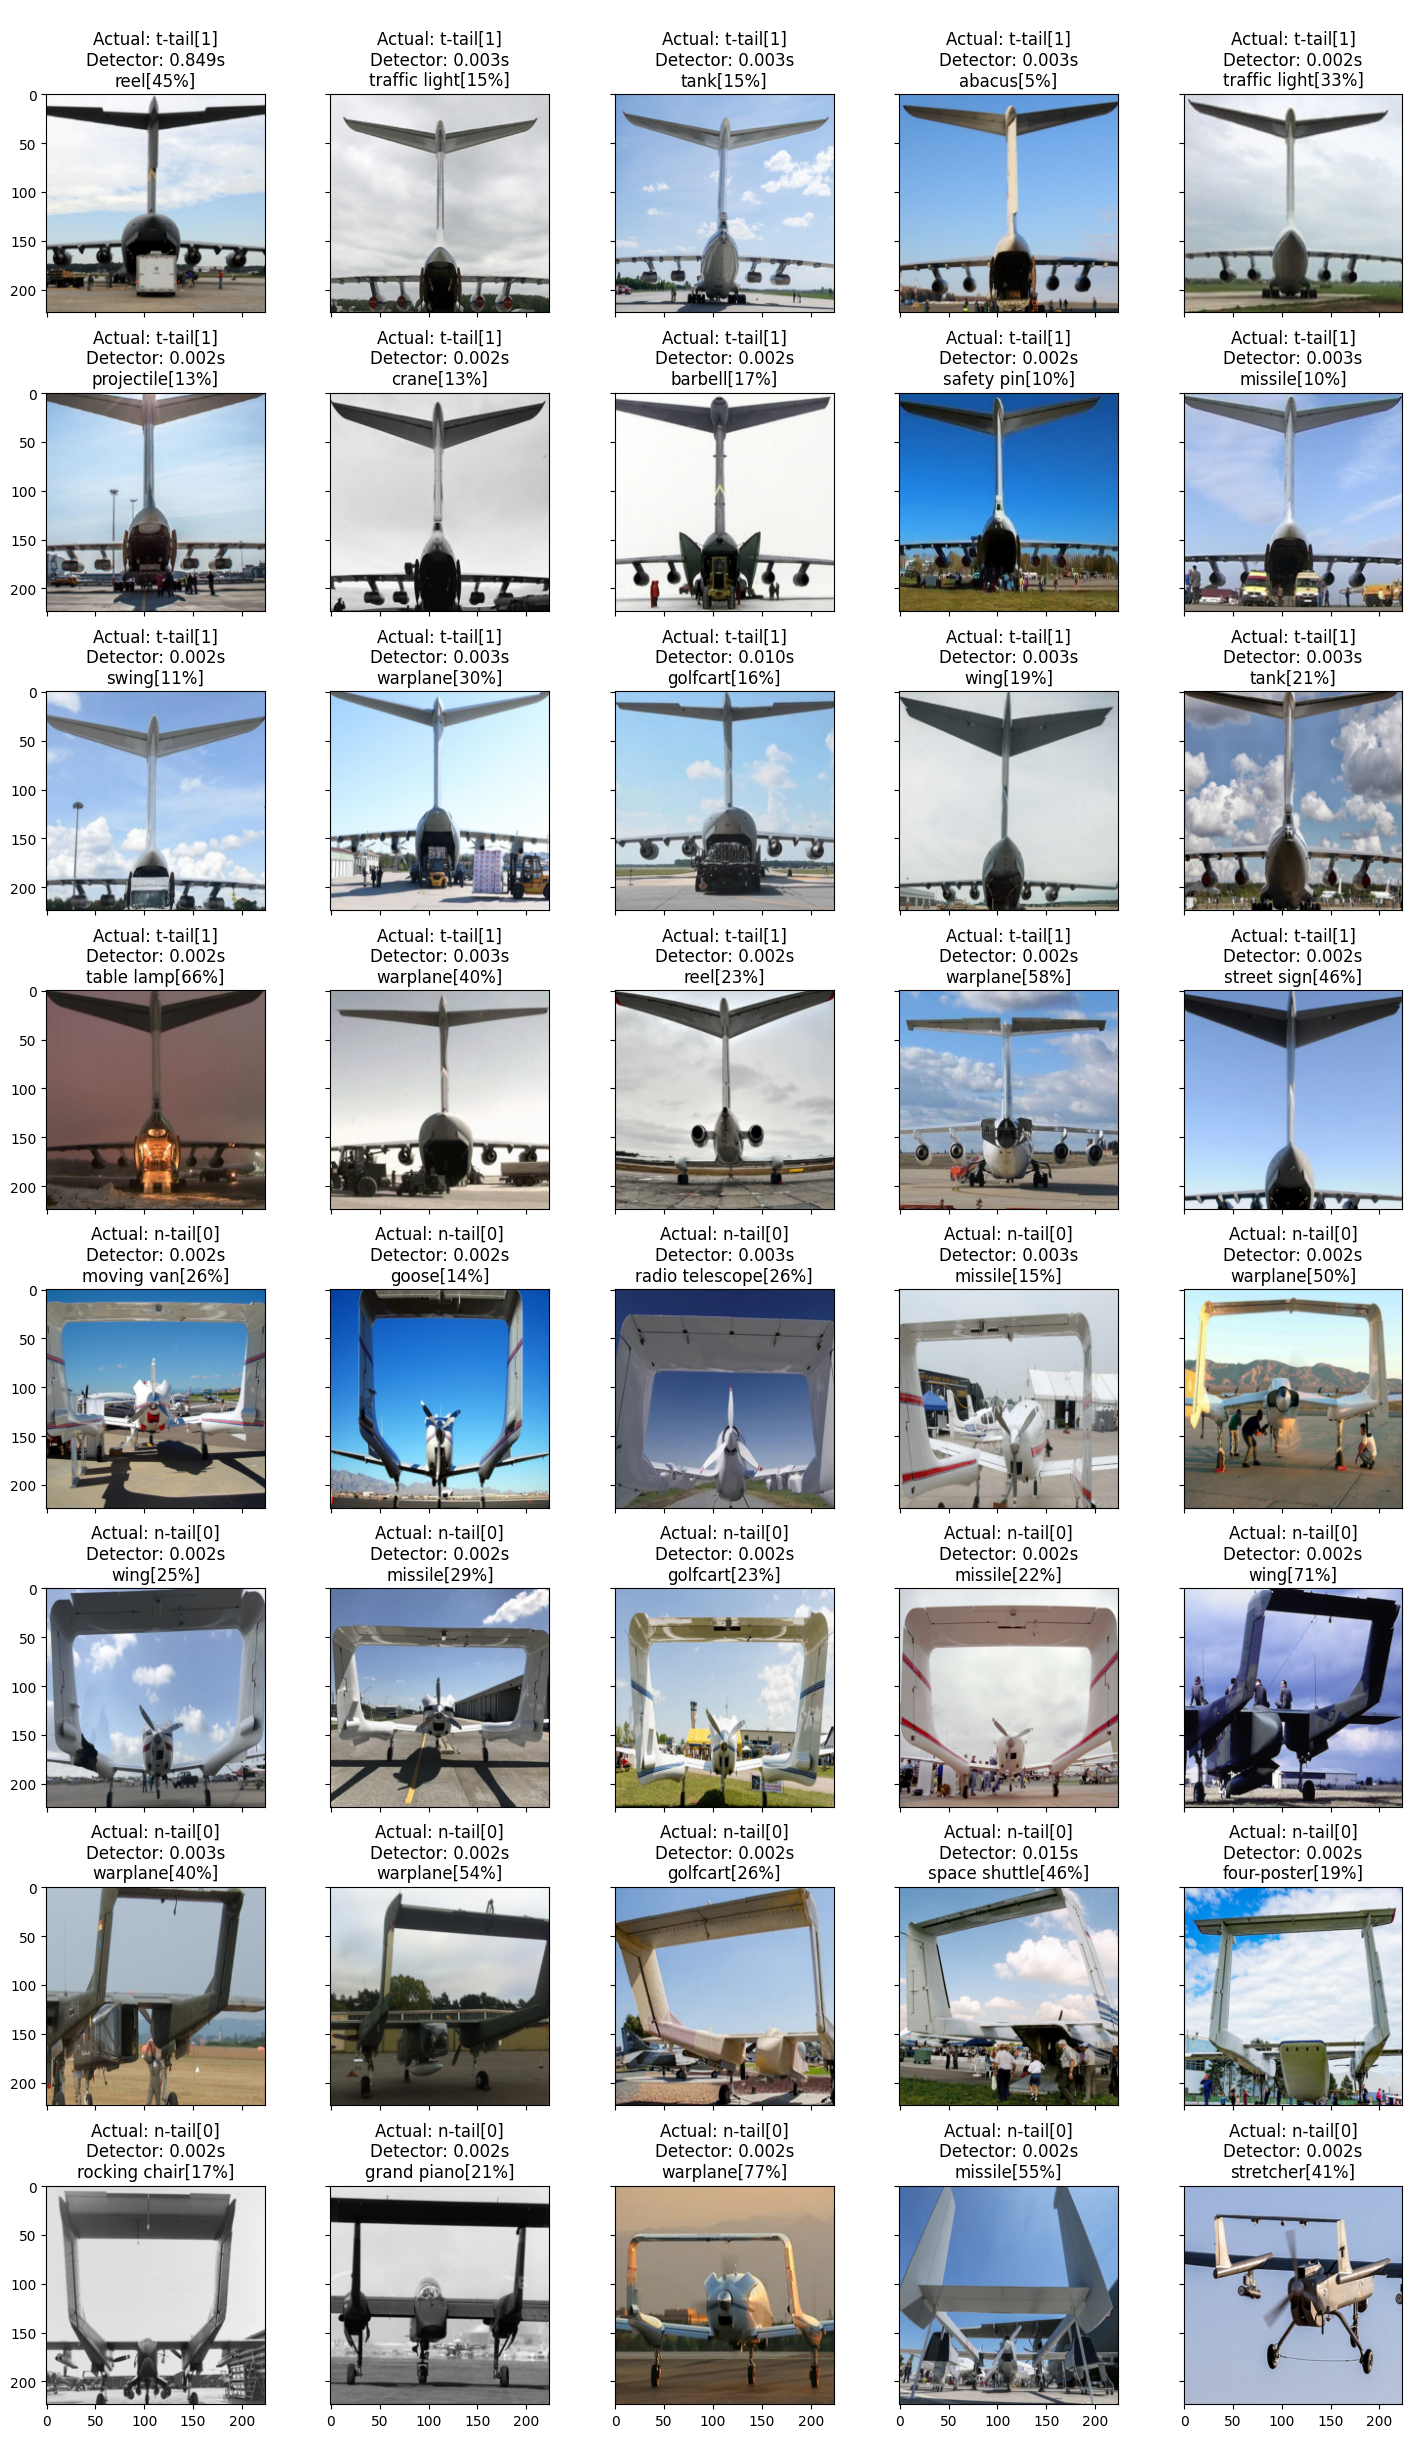

═══════════════════════════════════════════╣ Validate  dataset ╠══════════════════════════════════════════


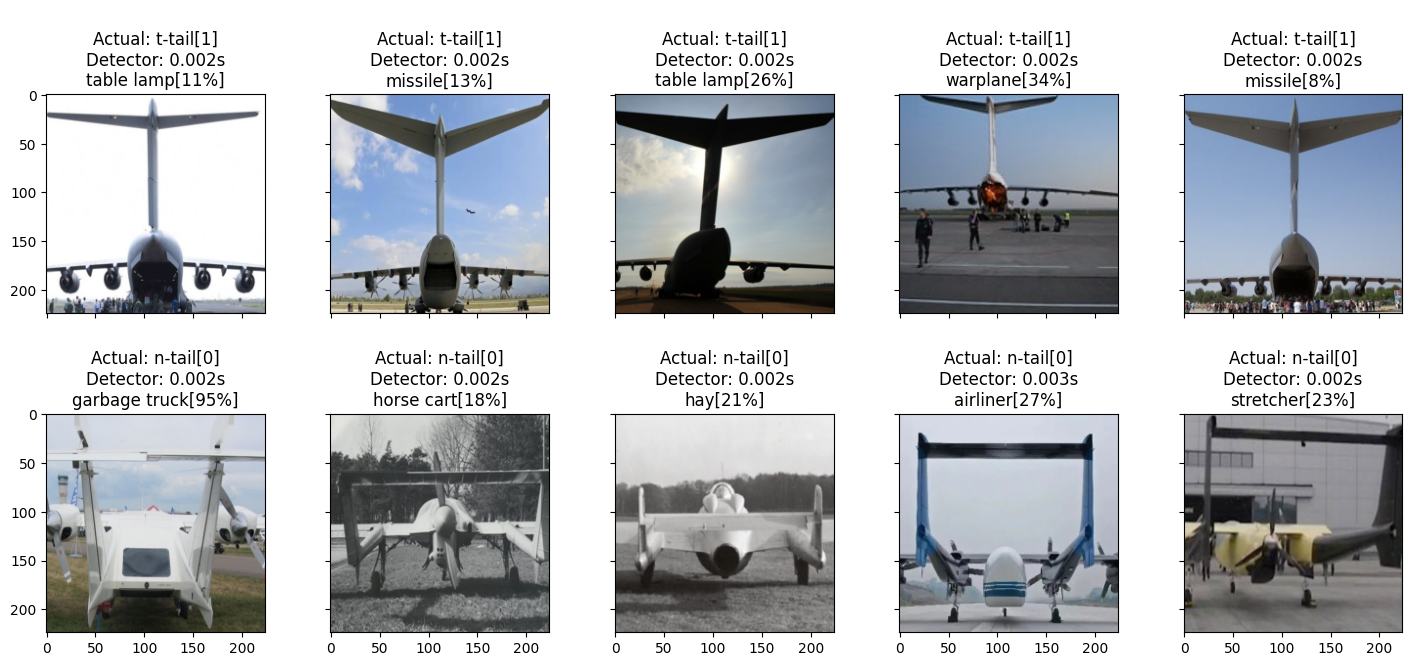

In [18]:
# Берем mobileNetV3_small, чтобы побыстрее всё нарисовал на следующем шаге
model = alexNet
getResult(model)

Также ниже изложим допонительный функционал, необходимый для анализа полученных результатов.

##Обзор метрик

Для того, чтобы более всеобъемлюще проанализировать полученные результаты изложим ниже допонительный функционал.

In [19]:
# Функция возвращает 2 параметра:
# 1) Возвращает массив скоростей затраченного временни (на каждую картинку)
# 2) Словарь полученных результатов и их частота
def classify_get_metrics(dataset: Dataset,
                preprocess: typing.Callable[[Tensor],Tensor],
                labels: typing.List[str],
                model_labels: typing.List[str] = None,
                model: typing.Callable[[Tensor], Tensor] = None,
                debug: typing.Any = False,
                num_of_classes: int = 1,
             ) -> None:
    num = len(dataset)

    # Выходные данные
    speeds  = []  # Массив затраченной времени на каждое изображение
    results = {}  # Словарь полученных результатов и их частота

    for i in range(0, len(dataset)):
        try:
            image, label = dataset[i]
            pred = None

            if model is not None and model_labels is not None:
                start_time = time.perf_counter()
                score = model(image.unsqueeze(0)).detach().squeeze(0).softmax(0)
                pred_index = numpy.flip(score.detach().cpu().argsort().numpy())[0]
                end_time = time.perf_counter()

                # Записываем метрики
                speeds.append((end_time - start_time))

                # Добавляем варианты угадайки в словарь с частотой их встречаемости
                if model_labels[pred_index] in results:
                    results[model_labels[pred_index]] += 1
                else:
                    results[model_labels[pred_index]] = 1

                #pred = f'Detector: {speeds[-1]:.0f}ms\n{model_labels[pred_index]}[{score[pred_index].item()*100:.0f}%]'
        except Exception as ex:
            if debug:
                raise ex
            print(f'Image {i} is failed to load: {str(ex)}')

    return speeds, results

In [20]:
# Функция для отрисовки полученных "угаданных" результатов и их частоты встречаемости
def print_results2barh(results_cpu, results_gpu, model_name):
    keys1, values1 = zip(*results_cpu.items())
    keys2, values2 = zip(*results_gpu.items())

    # Построение графика
    plt.figure(figsize=(10, max(6, len(results_cpu) * 0.3)))
    plt.barh(keys1, values1, label='CPU', height = 0.7, color='blue', alpha=0.7)
    #plt.barh(keys2, values2, label='GPU', height = 0.7,color='orange', alpha=0.7)

    # Добавление подписей
    #plt.xticks(rotation='vertical')
    plt.xlabel('Frequensy')
    plt.ylabel('Keys')
    plt.title(f'Model: {model_name}')
    plt.legend()
    plt.grid()

    # Отображение графика
    plt.show()

In [21]:
# Колхозная функция, которая возвращает кол-во ответов, приближенных к Т- или П- образному оперению
def check_corr_answers(results_cpu, correct_answers):
    answers = 0
    # Сколько правильных ответов
    for item in correct_answers:
    # Проверяем, есть ли текстовое значение в словаре
        if item in results_cpu:
        # Записываем цифровое значение в переменную
            answers += results_cpu[item]

    return answers

###CPU & GPU

╔════════════════════════════════════════════════════════════════════════════════════════════════════════╗
║	Model: AlexNet                                                                                   ║
║	Ответы с Т- или П-образным оперением: 0                                                          ║
║	Приближенные ответы, связанные с оперением: 9                                                    ║
╠════════════════════════════════════════════════════════════════════════════════════════════════════════╣
║	Device: cpu                                                                                      ║
║	AVG Speed on CPU, s: 0.056                                                                       ║
║	MAX Speed on CPU, s: 0.196                                                                       ║
║	MIN Speed on CPU, s: 0.042                                                                       ║
║	Full time on CPU, s: 2.253                                                   

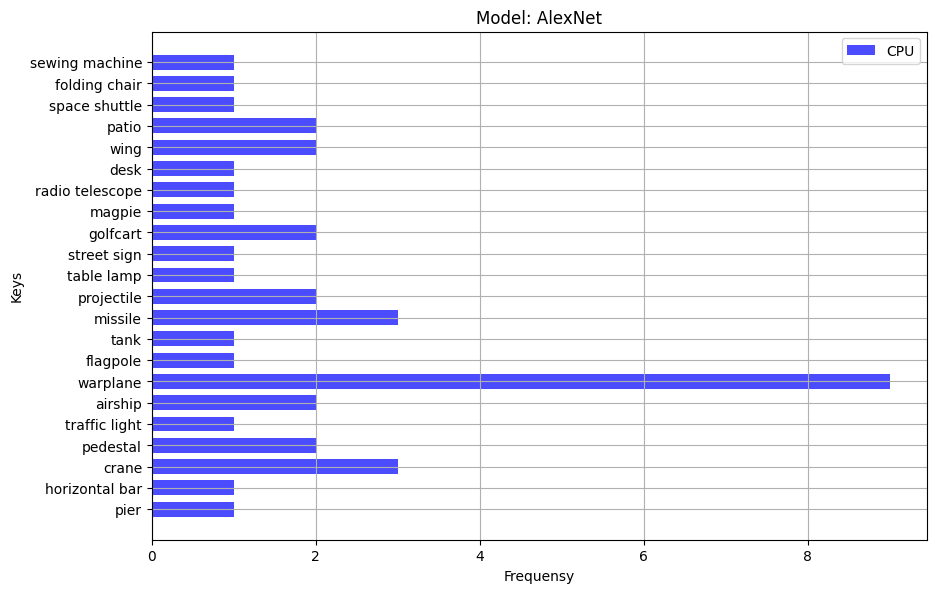

╔════════════════════════════════════════════════════════════════════════════════════════════════════════╗
║	Model: ResNet50                                                                                  ║
║	Ответы с Т- или П-образным оперением: 0                                                          ║
║	Приближенные ответы, связанные с оперением: 0                                                    ║
╠════════════════════════════════════════════════════════════════════════════════════════════════════════╣
║	Device: cpu                                                                                      ║
║	AVG Speed on CPU, s: 0.274                                                                       ║
║	MAX Speed on CPU, s: 1.015                                                                       ║
║	MIN Speed on CPU, s: 0.177                                                                       ║
║	Full time on CPU, s: 10.972                                                  

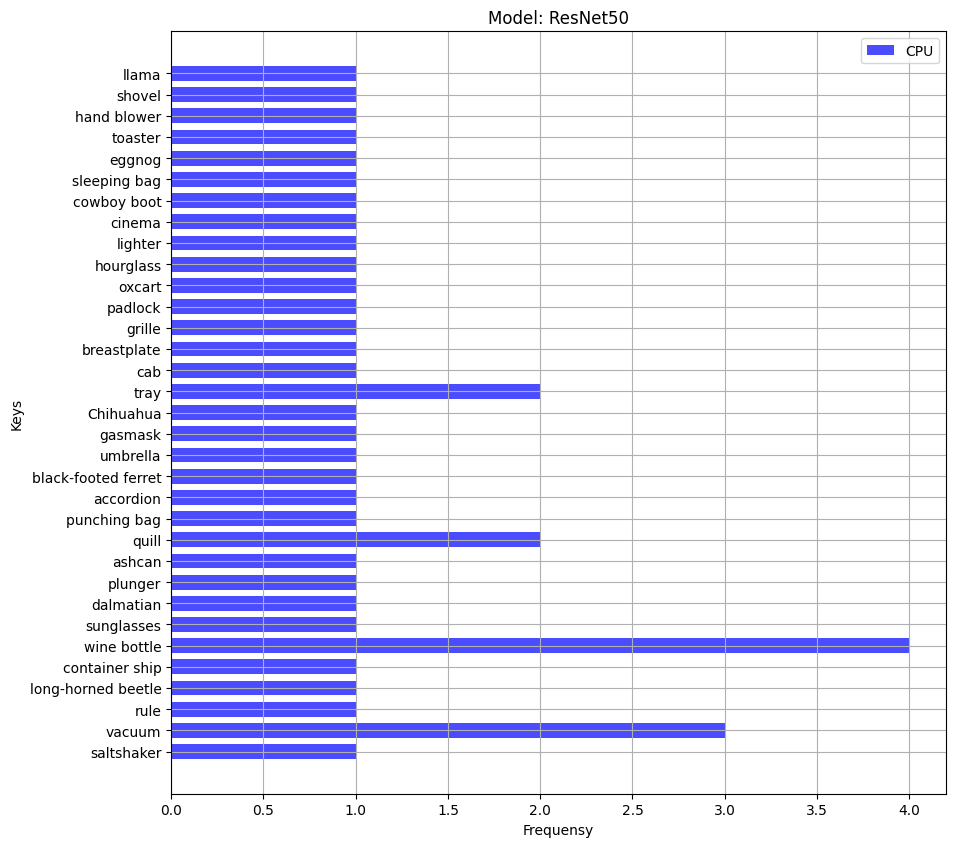

╔════════════════════════════════════════════════════════════════════════════════════════════════════════╗
║	Model: DenseNet                                                                                  ║
║	Ответы с Т- или П-образным оперением: 0                                                          ║
║	Приближенные ответы, связанные с оперением: 0                                                    ║
╠════════════════════════════════════════════════════════════════════════════════════════════════════════╣
║	Device: cpu                                                                                      ║
║	AVG Speed on CPU, s: 0.300                                                                       ║
║	MAX Speed on CPU, s: 0.397                                                                       ║
║	MIN Speed on CPU, s: 0.273                                                                       ║
║	Full time on CPU, s: 11.987                                                  

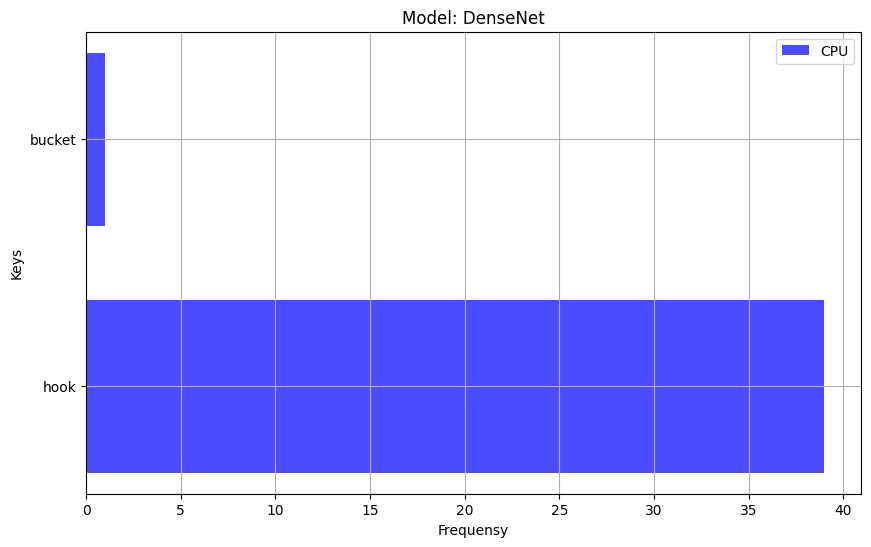

╔════════════════════════════════════════════════════════════════════════════════════════════════════════╗
║	Model: MobileNetV3_Small                                                                         ║
║	Ответы с Т- или П-образным оперением: 0                                                          ║
║	Приближенные ответы, связанные с оперением: 1                                                    ║
╠════════════════════════════════════════════════════════════════════════════════════════════════════════╣
║	Device: cpu                                                                                      ║
║	AVG Speed on CPU, s: 0.019                                                                       ║
║	MAX Speed on CPU, s: 0.030                                                                       ║
║	MIN Speed on CPU, s: 0.017                                                                       ║
║	Full time on CPU, s: 0.769                                                   

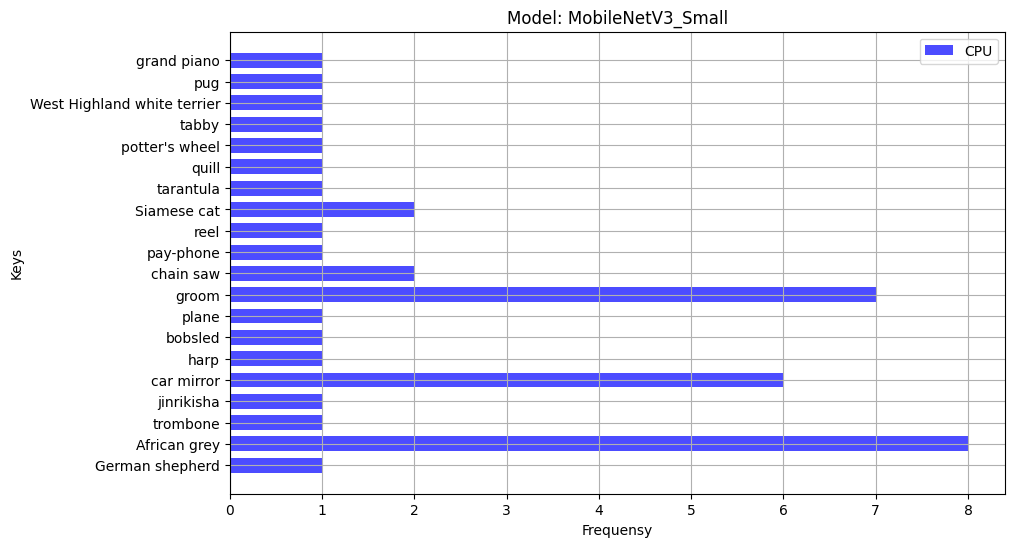

╔════════════════════════════════════════════════════════════════════════════════════════════════════════╗
║	Model: SwinT                                                                                     ║
║	Ответы с Т- или П-образным оперением: 0                                                          ║
║	Приближенные ответы, связанные с оперением: 34                                                   ║
╠════════════════════════════════════════════════════════════════════════════════════════════════════════╣
║	Device: cpu                                                                                      ║
║	AVG Speed on CPU, s: 0.225                                                                       ║
║	MAX Speed on CPU, s: 0.310                                                                       ║
║	MIN Speed on CPU, s: 0.198                                                                       ║
║	Full time on CPU, s: 8.987                                                   

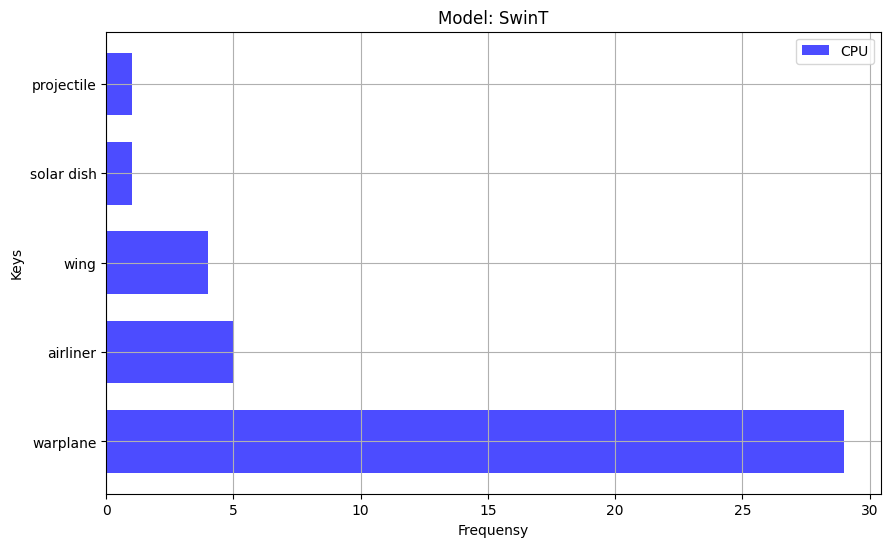

In [22]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Создание списка моделей и их параметров
models_list = [alexNet, resNet50, denseNet, mobileNetV3_small, swinT]
model_names = ['AlexNet', 'ResNet50', 'DenseNet', 'MobileNetV3_Small', 'SwinT']

# Массиа правильных ответов
# Массив ответов, которые примем за приближенные
correct_answers = ['t-tail', 'T-tail', 't tail', 'T tail', 'u-tail', 'U-tail', 'u tail', 'U tail', 'boom tail', 'n-tail', 'n tail','U-shaped', 'u-shaped', 'U shaped', 'u shaped', 'tee tail', 'high boom tail']
approx_answers = ['tail', 'plane', 'warplane', 'airliner']

# Подготовка данных для сравнения
results_cpu = {}          # словрь, в котором хранится частота встречаемости предсказания и содержание самого предсказания
results_gpu = {}

speeds_cpu = []           # массив, в котором хранится затраченное время на каждый элемент CPU
speeds_cpu_graph_avg = [] # массив, в котором хранится среднее время CPU: index 0 - alexnet, 1 - resnet50 и т.д.
speeds_cpu_graph_med = [] # массив, в котором хранится медианное время CPU: index 0 - alexnet, 1 - resnet50 и т.д.
full_time_cpu = []
speeds_gpu = []           # массив, в котором хранится затраченное время на каждый элемент GPU
speeds_gpu_graph_avg = [] # массив, в котором хранится среднее время GPU: index 0 - alexnet, 1 - resnet50 и т.д.
speeds_gpu_graph_med = [] # массив, в котором хранится медианное время GPU: index 0 - alexnet, 1 - resnet50 и т.
full_time_gpu = []


total_num_items = []      # массив, в котором общее кол-во элементов: index 0 - alexnet, 1 - resnet50 и т.д.

accuracies = []

for model, model_name in zip(models_list, model_names):

    transform = model['preprocess']

    # Измерение средней скорости классификации на CPU
    train = UrlDataset("train.csv", None, transform)
    model['model'].to("cpu")
    # кладем сюда общее кол-во элементов
    total_num_items.append(sum(item.numel() for item in model["model"].parameters()))
    speeds_cpu, results_cpu = classify_get_metrics(train, denormalize(train, transform), labels = train.classes, model=model['model'], model_labels=model['weights'].meta["categories"])
    speeds_cpu_graph_avg.append(sum(speeds_cpu)/len(speeds_cpu))
    speeds_cpu_graph_med.append(statistics.median(speeds_cpu))
    full_time_cpu.append(sum(speeds_cpu))

    # Вывод примеров успешных и неуспешных результатов
    print(f'╔' + '═'*104 + '╗')
    print(f'║\tModel: ' + '{:<89}'.format(model_name) + ' ║')
    print(f'║\tОтветы с Т- или П-образным оперением: ' + '{:<58}'.format(check_corr_answers(results_cpu, correct_answers)) + ' ║')
    print(f'║\tПриближенные ответы, связанные с оперением: ' + '{:<52}'.format(check_corr_answers(results_cpu,approx_answers)) + ' ║')
    print(f'╠' + '═'*104 + '╣')
    print(f'║\tDevice: ' + '{:<88}'.format(str(next(model['model'].parameters()).device)) + ' ║')
    print(f'║\tAVG Speed on CPU, s: ' + '{:<75}'.format('{:.3f}'.format(speeds_cpu_graph_avg[-1])) + ' ║')
    print(f'║\tMAX Speed on CPU, s: ' + '{:<75}'.format('{:.3f}'.format(max(speeds_cpu))) + ' ║')
    print(f'║\tMIN Speed on CPU, s: ' + '{:<75}'.format('{:.3f}'.format(min(speeds_cpu))) + ' ║')
    print(f'║\tFull time on CPU, s: ' + '{:<75}'.format('{:.3f}'.format(sum(speeds_cpu))) + ' ║')

    # Измерение средней скорости классификации на GPU
    train = UrlDataset("train.csv", device, transform)
    model['model'].to("cuda:0") #[1], {1: 1}
    speeds_gpu, results_gpu = classify_get_metrics(train, denormalize(train, transform), labels = train.classes, model=model['model'], model_labels=model['weights'].meta["categories"])
    speeds_gpu_graph_avg.append(sum(speeds_gpu)/len(speeds_gpu))
    speeds_gpu_graph_med.append(statistics.median(speeds_gpu))
    full_time_gpu.append(sum(speeds_gpu))

    print(f'╠' + '═'*104 + '╣')
    print(f'║\tDevice: ' + '{:<88}'.format(str(next(model['model'].parameters()).device)) + ' ║')
    print(f'║\tAVG Speed on GPU, s: ' + '{:<75}'.format('{:.3f}'.format(speeds_gpu_graph_avg[-1])) + ' ║')
    print(f'║\tMAX Speed on GPU, s: ' + '{:<75}'.format('{:.3f}'.format(max(speeds_gpu))) + ' ║')
    print(f'║\tMIN Speed on GPU, s: ' + '{:<75}'.format('{:.3f}'.format(min(speeds_gpu))) + ' ║')
    print(f'║\tFull time on GPU, s: ' + '{:<75}'.format('{:.3f}'.format(sum(speeds_gpu))) + ' ║')
    print(f'╚' + '═'*104 + '╝')

    print_results2barh(results_cpu, results_gpu, model_name)

###~~TPU~~

UPD: к сожалению, без платной подписки применить TPU не получится.

Для того, чтобы запустить процесс на TPU, ~~пришлось переломать весь проект и теперь, чтобы его запустить, нужно знать последовательность запуска ячеек; также пришлось внедрить пару костылей~~ необходимо выполнять программный код в отдельной ячейке от CPU и GPU, а также указать среду выполнения 'TPU'.

In [ ]:
import os
assert os.environ['COLAB_TPU_ADDR'], 'Make sure to select TPU from Edit > Notebook settings > Hardware accelerator'

In [ ]:
!pip install cloud-tpu-client==0.10 torch==2.0.0 torchvision==0.15.1 https://storage.googleapis.com/tpu-pytorch/wheels/colab/torch_xla-2.0-cp310-cp310-linux_x86_64.whl

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.9/162.9 MB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 619.9/619.9 MB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 58.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.7/57.7 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.0/21.0 MB 43.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 849.3/849.3 kB 51.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 51.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 557.1/557.1 MB 956.9 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.1/317.1 MB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.4/168.4 MB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.6/54.6 MB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.6/102.6 MB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━

In [ ]:
import torch_xla
import torch_xla.core.xla_model as xm

In [ ]:
# При обработке denseNet код падает :(

device = xm.xla_device()

# Создание списка моделей и их параметров
models_list = [alexNet, resNet50, denseNet, mobileNetV3_small, swinT]
model_names = ['AlexNet', 'ResNet50', 'DenseNet', 'MobileNetV3_Small', 'SwinT']

# Подготовка данных для сравнения
speeds_tpu = []           # массив, в котором хранится затраченное время на каждый элемент GPU
speeds_tpu_graph_avg = [] # массив, в котором хранится среднее время GPU: index 0 - alexnet, 1 - resnet50 и т.д.
speeds_tpu_graph_med = [] # массив, в котором хранится медианное время GPU: index 0 - alexnet, 1 - resnet50 и т.
full_time_tpu = []

for model, model_name in zip(models_list, model_names):

    transform = model['preprocess']

    # Измерение средней скорости классификации на CPU
    train = UrlDataset("train.csv", device, transform)
    model['model'].to(device)
    # кладем сюда общее кол-во элементов
    speeds_tpu, results_tpu = classify_get_metrics(train, denormalize(train, transform), labels = train.classes, model=model['model'], model_labels=model['weights'].meta["categories"])
    speeds_tpu_graph_avg.append(sum(speeds_tpu)/len(speeds_tpu))
    speeds_tpu_graph_med.append(statistics.median(speeds_tpu))
    full_time_tpu.append(sum(speeds_tpu))

    # Вывод примеров успешных и неуспешных результатов
    print(f'╔' + '═'*104 + '╗')
    print(f'║\tModel: ' + '{:<89}'.format(model_name) + ' ║')
    print(f'╠' + '═'*104 + '╣')
    print(f'║\tDevice: ' + '{:<88}'.format(str(next(model['model'].parameters()).device)) + ' ║')
    print(f'║\tAVG Speed on CPU, s: ' + '{:<75}'.format('{:.3f}'.format(speeds_tpu_graph_avg[-1])) + ' ║')
    print(f'║\tMAX Speed on CPU, s: ' + '{:<75}'.format('{:.3f}'.format(max(speeds_tpu))) + ' ║')
    print(f'║\tMIN Speed on CPU, s: ' + '{:<75}'.format('{:.3f}'.format(min(speeds_tpu))) + ' ║')
    print(f'║\tFull time on CPU, s: ' + '{:<75}'.format('{:.3f}'.format(sum(speeds_tpu))) + ' ║')
    print(f'╚' + '═'*104 + '╝')

###Гистограммы сранения CPU, GPU ~и TPU~

Построим график средней скорости классификации изображений для разных моделей (AlexNet, DenseNet, MobileNet, ResNet50, SwinT), а также сред исполнения (CPU, GPU ~и TPU~).

In [24]:
def printSpeedMetrics(speeds_cpu_graph, speeds_gpu_graph, caption):
  bar_width = 0.3  # Ширина столбцов

  # Создаем массив смещенных позиций для GPU
  bar_positions_cpu = numpy.arange(len(model_names))
  bar_positions_gpu = bar_positions_cpu + bar_width

  plt.figure(figsize=(10, 6))

  # Построим столбцы для CPU и GPU
  plt.bar(bar_positions_cpu, speeds_cpu_graph, width=bar_width, label='CPU')
  plt.bar(bar_positions_gpu, speeds_gpu_graph, width=bar_width, label='GPU', alpha=0.7)

  # Вывод значений каждого столбца
  for i, value in enumerate(speeds_cpu_graph):
      plt.text(bar_positions_cpu[i], value + 0.001, str(round(value, 3)), ha='center', va='bottom')

  for i, value in enumerate(speeds_gpu_graph):
      plt.text(bar_positions_gpu[i], value + 0.001, str(round(value, 3)), ha='center', va='bottom')

  plt.xlabel('Model')
  plt.ylabel('Speed (seconds per image)')
  plt.title(caption)
  plt.xticks(bar_positions_cpu + bar_width / 2, model_names)
  plt.legend()
  plt.grid()
  plt.show()

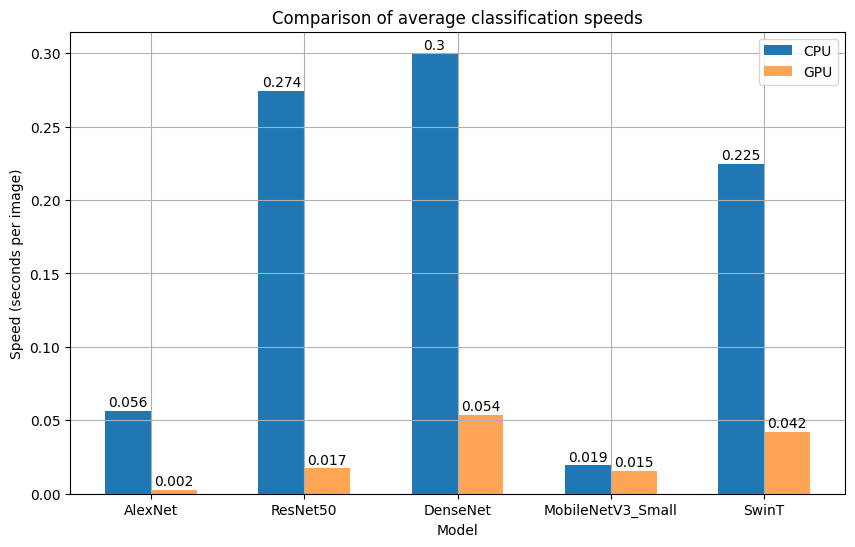

In [25]:
printSpeedMetrics(speeds_cpu_graph_avg, speeds_gpu_graph_avg, 'Comparison of average classification speeds')

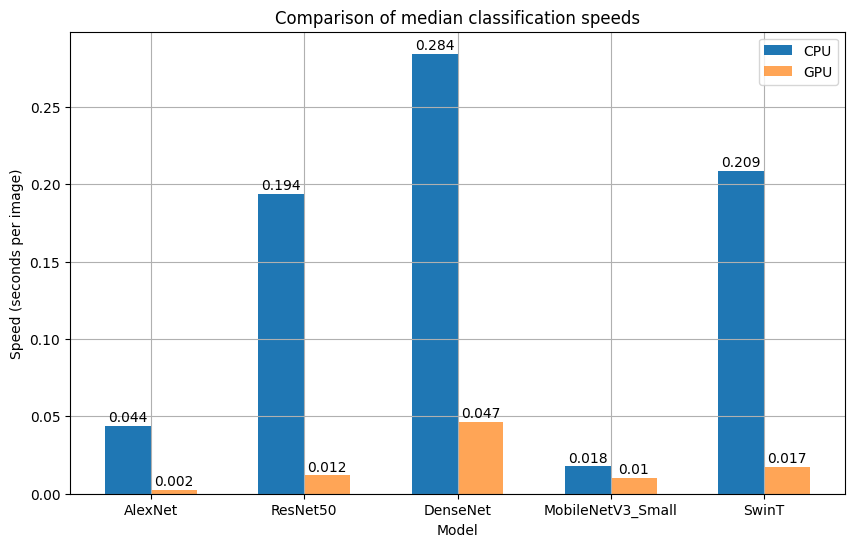

In [29]:
printSpeedMetrics(speeds_cpu_graph_med, speeds_gpu_graph_med, 'Comparison of median classification speeds')

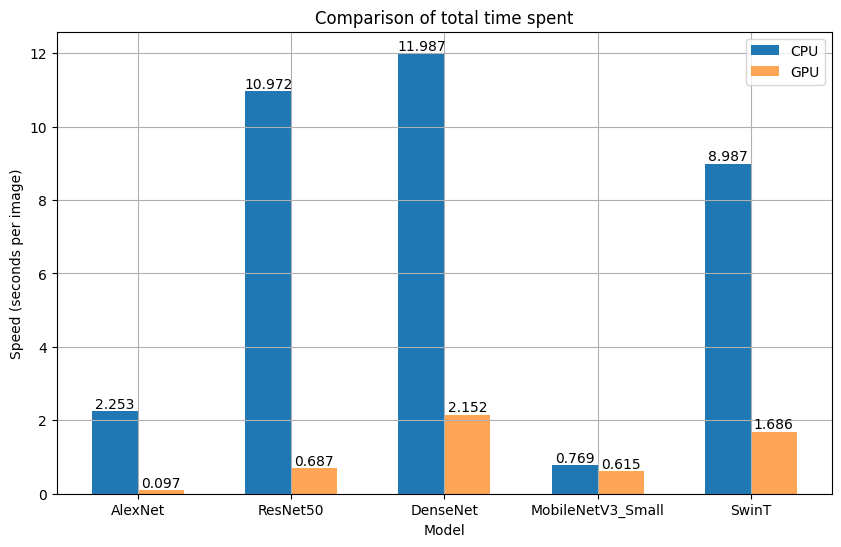

In [27]:
printSpeedMetrics(full_time_cpu, full_time_gpu, 'Comparison of total time spent')

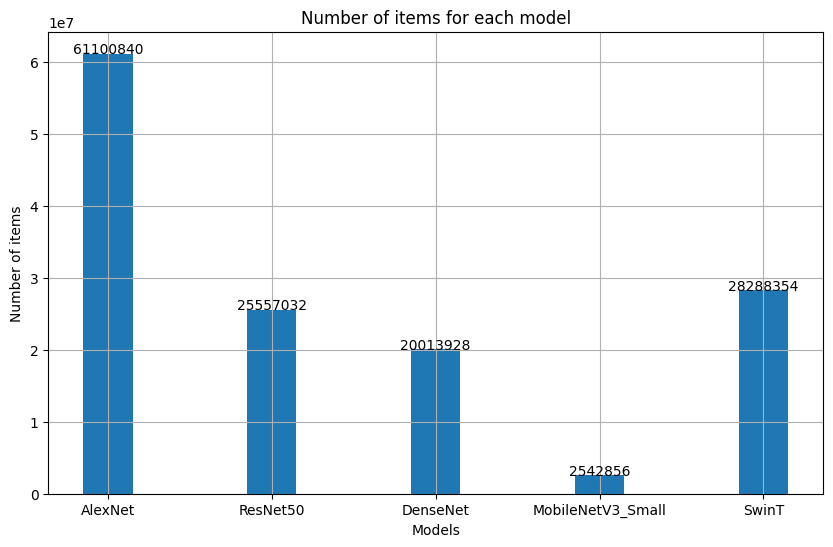

In [28]:
bar_width = 0.3
plt.figure(figsize=(10, 6))

plt.bar(model_names, total_num_items, width=bar_width)

for i, value in enumerate(total_num_items):
    plt.text(i, value + 0.1, str(value), ha='center')

plt.xlabel('Models')
plt.ylabel('Number of items')
plt.title('Number of items for each model')
plt.grid()
plt.show()

Строить график точности как *отношение числа правильно распознанных к общему числу изображений в датасете* **не является целесообразным**, поскольку ислледуемая область (Т- и П-образные оперения) является слишком специфичной.

Ни одна из ранее упомянутых моделей не способна идентицифировать оперения. Исходя из графиков видно, что наилучший приближенный результат - 'самолет', 'военный самолет' и 'крыло', что, конечно же, нельзя назвать удовлетворительным результатом.

Следовательно, необходимо провети донастройку модели под специфическую задачу классификации. Будем в последствии использовать исключительно модель SwinT. Перед этмс рассмотрим примеры успешных/неуспешных резульатов.

##Примеры успешных/неуспешных результатов

####AlexNet

In [ ]:
# model = alexNet
# getResult(model)

На рисунке ниже представлены лучшие (слева) и худшие (справа) результаты предсказаний модели AlexNet для Т- и П-образного оперений. Будем считать, что 'warplane' - лучшая из всех предложенных вариаций, встретилась 7 раз. Ожидаемо, что оперение не было распознано, уже и не говоря о его типе.

Случай с *танком* можно попробовать объяснить тем, что у кормы самолета расположены два автомобила скорой медицинской помощи, а также оранжевый погрузочный автомобиль. Вероятно, из этого и было сделано предсказание.

В случае с *вилочным погрузчиком*, возможно, что модель восприняла два хвоста самолета как 'вилы'.

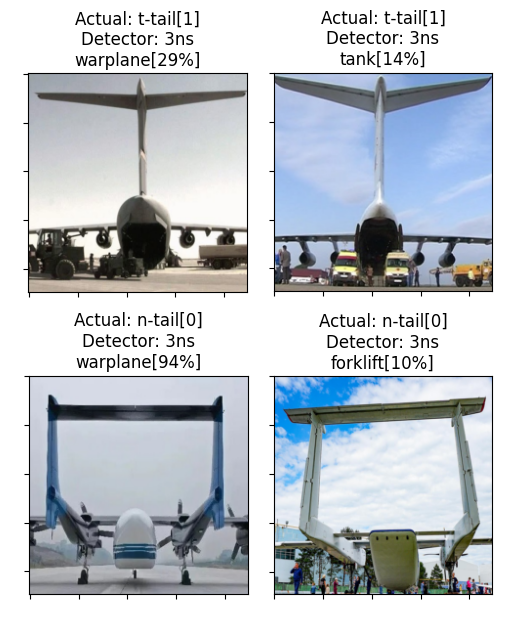

####ResNet-50

In [ ]:
# model = resNet50
# getResult(model)

Комментарии излишни, результат работы неудовлетворителен.

image.png

####denseNet

In [ ]:
# model = denseNet
# getResult(model)

Аналогично предыдущему случаю. Комментарии излишни, результат работы неудовлетворителен.

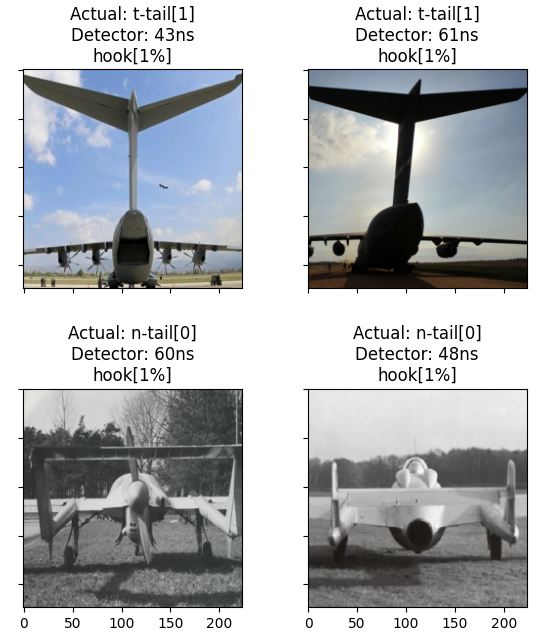

####MobileNetV3_small

In [ ]:
# model = mobileNetV3_small
# getResult(model)

Результат работы неудовлетворителен, по аналогии с предыдущими двумя нет взаимосвязи с летательным средством.

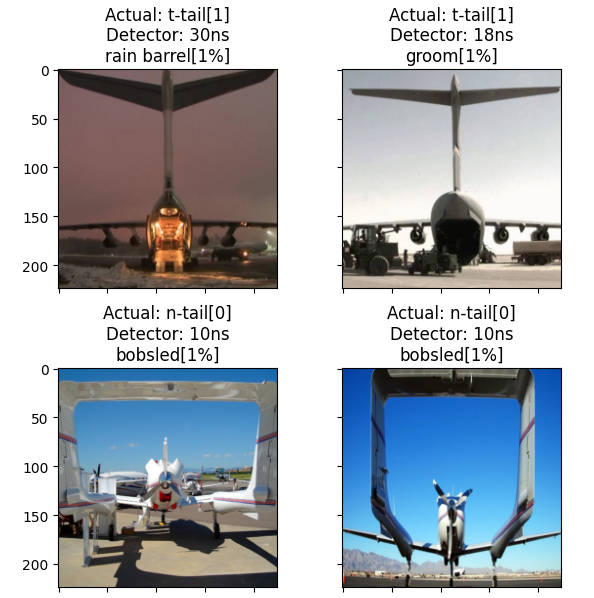

####swinT

In [ ]:
# model = swinT
# getResult(model)

Модель SwinT показала наилучший результат по распознованию летательных средств. Но даже эта модель не справилась c тем, чтобы распознать оперение и тем более его тип. Стоит добавить, что swinT обладает неплохим временем распознования.

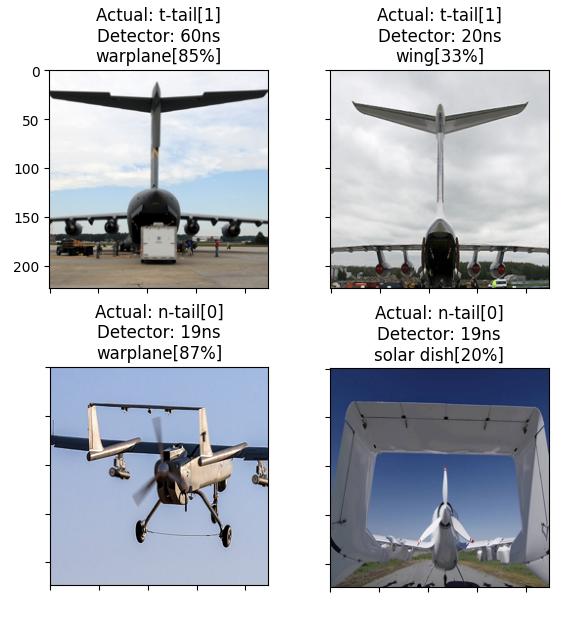

##Предобученная нейронная сеть как генератор признаков


Наиболее простой способ адаптации предобученных моделей к специфической задаче это переобучение выходного классификатора, который вычисляет принадлежность изображения к тому или иному классу. Это возможно благодаря особенности глубоких нейронных сетей, состоящей в том, что по мере преобразования между слоями происходит постепенный переход от конкретного изображения как набора пикселей к более обощённому представлению (пространство признаков), инвариантных к второстепенной информации (фон, повороты, растяжения, освещенность и т.д.). Таким образом, выходной слой лишь использует обобщённое пространство признаков для разделения на области, относящщиеся к разным классам объектов. И если цель состоит в создании иного разбиения, то достаточно заменить выходной слой на новый классификатор, настроив его на распознавание нужных классов объктов.

Популярным способом разбиения пространства признаков в случае существенно отличаюзихся классов является использование линейной гиперповерхности (линейный классификатор). Его преимуществом является простота и как следствие эффективность на небольших выборках. Основной недостаток - невозможность реализации сложных разбиений между близкими классами объектов. Для визуальной проверки возможности применения линейного классификатора в конкретной задаче можно использовать метод редукции многомерного пространства признаков, полученных на выходе предпоследнего слоя предобученной модели.

В моделях библиотеки PyTorch для этого с учетом фиксированной последовательности слоев (специфика библиотеки) необходимо отключить слой классификации, заменив его на единичное преобразование. В таком виде модель нейросети будет играть роль генератора признаков.

В первую очередь рассмотрим структуру модели и найдем в ней выходной классификатор

In [ ]:
model = swinT
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model['model'].to(device)
transform = model['preprocess']

Выходной слой это classifier (зачастую это даже не один слой, а группа слоев, наделяющих классификатор нужными свойствами). Уберем его, чтобы получить на выходе набор признаков. Для этого заменим выходной классификатор на единичное преобразование.



In [ ]:
print(model)

{'model': SwinTransformer(
  (features): Sequential(
    (0): Sequential(
      (0): Conv2d(3, 96, kernel_size=(4, 4), stride=(4, 4))
      (1): Permute()
      (2): LayerNorm((96,), eps=1e-05, elementwise_affine=True)
    )
    (1): Sequential(
      (0): SwinTransformerBlock(
        (norm1): LayerNorm((96,), eps=1e-05, elementwise_affine=True)
        (attn): ShiftedWindowAttention(
          (qkv): Linear(in_features=96, out_features=288, bias=True)
          (proj): Linear(in_features=96, out_features=96, bias=True)
        )
        (stochastic_depth): StochasticDepth(p=0.0, mode=row)
        (norm2): LayerNorm((96,), eps=1e-05, elementwise_affine=True)
        (mlp): MLP(
          (0): Linear(in_features=96, out_features=384, bias=True)
          (1): GELU(approximate='none')
          (2): Dropout(p=0.0, inplace=False)
          (3): Linear(in_features=384, out_features=96, bias=True)
          (4): Dropout(p=0.0, inplace=False)
        )
      )
      (1): SwinTransformerBloc

In [ ]:
train = UrlDataset("train.csv", device, transform)
validate  = UrlDataset('validate.csv' , device, transform)

image, label = validate[0]
feature_extractor = copy.deepcopy(model['model'])
result = feature_extractor(image.unsqueeze(0)).cpu().detach().squeeze(0).numpy()
print(f'Размерность выходов исходной модели: {result.shape}')
setattr(feature_extractor, model['output_layer'], nn.Identity())
result = feature_extractor(image.unsqueeze(0)).cpu().detach().squeeze(0).numpy()
print(f'Размерность выходов модели после замены выходного классификатора на единичное преобразование: {result.shape}')

Размерность выходов исходной модели: (1000,)
Размерность выходов модели после замены выходного классификатора на единичное преобразование: (768,)


Попробуем визуализировать каким-либо образом пространство признаков, обозначая объекты целевых классов разными цветами. Общая гипотеза состоит в том, что изображения разных классов должны лежать в разных областях пространства признаков (т.е. они выглядят как сосредоточенные "облака" точек, которые в свою очередь расположены на значительном удвлении друг от друга). В этом случае с помощью линейной гиперплоскости можно спроецировать точки в N-мерном пространстве признаков на эту плоскость и получить одно-, двух- или трехмерные проекции этих облаков, которые уже можно визуализировать на графике. Таким образом, для проверки гипотезы достаточно убедиться, что проекции "облаков" разных классов будут визуально изолированы. В этом случае перенастройка линейного классификатора на выходе нейронной сети приведет к решению задачи классификации на индивидуальной выборке объектов.

Чтобы получить двухмерную проекцию точек пространства признаков воспользуемся методом редукции размерности на основе метода линейного PCA (Principial Component Analysis). Суть его состоит в отыскании такой линейной гиперплоскости в N-мерном пространстве, расстояние до которой всех точек будет минимальным (т.е. она максимально аппроксимирует данные). Координаты спроецированных точек в пространстве этой гиперповерхности как раз и являются искомым двухмерным представлением "облаков", характеризующих разные классы объектов выборки.

Итак, первым делом преобразуем имеющиеся списки изображений в массивы признаков и лэйблов классов.



In [ ]:
output = []
for image, label in torch.utils.data.ConcatDataset([train, validate]):
    result = {'label': label, 'feature': feature_extractor(image.unsqueeze(0)).cpu().detach().squeeze(0).numpy()}
    output.append(result)
features = numpy.concatenate([numpy.expand_dims(record['feature'], 0) for record in output])
labels = [record['label'] for i, record in enumerate(output)]

Далее применим PCA-метод, который на основе N-мерных массивов признаков вычислит координаты точек на гиперплоскости (U), список собственных чисел (S) и собственных векторов (V) для преобразования координат между основным и редуцированным пространством.



In [ ]:
totalU, totalS, totalV = torch.pca_lowrank(torch.from_numpy(features), q=2)

Для визуализации остается совершить трансформации осей массивов, чтобы получить ряды для координат абсцис и ординат графика, а также разделить массивы точек разных классов, чтобы каждому задать свой цвет.



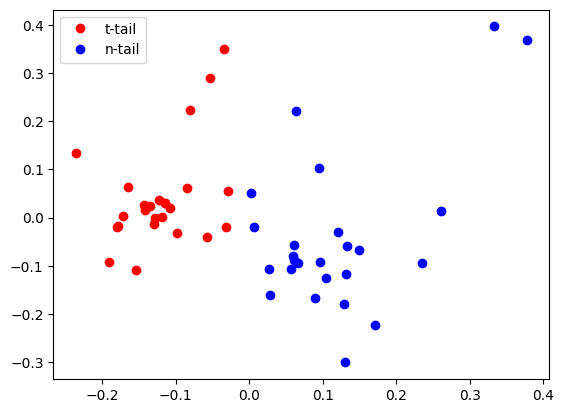

In [ ]:
series = {}
for key in ['t-tail', 'n-tail']:
    points = numpy.concatenate([numpy.expand_dims(totalU[i,:].cpu().detach().numpy(), 0)
        for i, label in enumerate(labels) if train.classes[label] == key])
    series[key] = numpy.moveaxis(points, 1, 0)

plt.figure()
plt.plot(series['t-tail'][0], series['t-tail'][1], 'ro', series['n-tail'][0], series['n-tail'][1], 'bo')
plt.legend(['t-tail', 'n-tail'])
plt.show()



На графике выше видно, что даже на двухмерной проекции точки разных классов лежат в разных областях и могут быть легко разделены прямой. Это означает, что применение линейного классификатора в данном случае выглядит оправданым.



##Донастройка модели под специфическую задачу классификации


Донастройка происходит за счет переобучения выходных слоев глубинной нейронной сети, отвечающих за различие частных деталей разных классов (https://pytorch.org/tutorials/beginner/transfer_learning_tutorial.html).

Мы будем использовать простейший классификатор - линейный, который играет роль гиперплоскости в N-мерном пространстве, разделющей пространство признаков на 2 части. Преимуществом такого классификатора является его простота, высокая скорость обучения, а также нужный результат даже при небольшом наборе данных (здесь действует эмпирическое правило: чем проще модель, тем меньше данных нужно для её обучения). Основной недостаток линейного классификатора - недостаточная сложность для случаев, когда классы визуально близки, отличаясь только нюансами. В таких ситуациях гиперплоскость является слишком простой моделью и необходимо использовать нелинейную гиперповерхность (нелинейный классификатор).

Так как мы не планируем менять коэффициенты предобученных слоев, первым делом необходимо отключить их перенастройку.



In [ ]:
tunned_model = copy.deepcopy(model['model'])
for param in tunned_model.parameters():
    param.requires_grad = False

Затем добавим новый слой-классификатор на выходе

In [ ]:
print(tunned_model)

SwinTransformer(
  (features): Sequential(
    (0): Sequential(
      (0): Conv2d(3, 96, kernel_size=(4, 4), stride=(4, 4))
      (1): Permute()
      (2): LayerNorm((96,), eps=1e-05, elementwise_affine=True)
    )
    (1): Sequential(
      (0): SwinTransformerBlock(
        (norm1): LayerNorm((96,), eps=1e-05, elementwise_affine=True)
        (attn): ShiftedWindowAttention(
          (qkv): Linear(in_features=96, out_features=288, bias=True)
          (proj): Linear(in_features=96, out_features=96, bias=True)
        )
        (stochastic_depth): StochasticDepth(p=0.0, mode=row)
        (norm2): LayerNorm((96,), eps=1e-05, elementwise_affine=True)
        (mlp): MLP(
          (0): Linear(in_features=96, out_features=384, bias=True)
          (1): GELU(approximate='none')
          (2): Dropout(p=0.0, inplace=False)
          (3): Linear(in_features=384, out_features=96, bias=True)
          (4): Dropout(p=0.0, inplace=False)
        )
      )
      (1): SwinTransformerBlock(
       

In [ ]:
print(getattr(tunned_model, model['output_layer']))

Linear(in_features=768, out_features=1000, bias=True)


In [ ]:
in_features = model['in_features'](tunned_model)
print(in_features)

768


Теперь добавим линейный классификатор с нужным числом входов и двумя выходами. Выход классификатора пропустим через Softmax слой, чтобы получить на вызоде нормированный сигнал из диапазона [0;1].



In [ ]:
setattr(tunned_model, model['output_layer'], torch.nn.Sequential(torch.nn.Linear(in_features, 2), torch.nn.Softmax(dim=1)))

In [ ]:
print(tunned_model)

SwinTransformer(
  (features): Sequential(
    (0): Sequential(
      (0): Conv2d(3, 96, kernel_size=(4, 4), stride=(4, 4))
      (1): Permute()
      (2): LayerNorm((96,), eps=1e-05, elementwise_affine=True)
    )
    (1): Sequential(
      (0): SwinTransformerBlock(
        (norm1): LayerNorm((96,), eps=1e-05, elementwise_affine=True)
        (attn): ShiftedWindowAttention(
          (qkv): Linear(in_features=96, out_features=288, bias=True)
          (proj): Linear(in_features=96, out_features=96, bias=True)
        )
        (stochastic_depth): StochasticDepth(p=0.0, mode=row)
        (norm2): LayerNorm((96,), eps=1e-05, elementwise_affine=True)
        (mlp): MLP(
          (0): Linear(in_features=96, out_features=384, bias=True)
          (1): GELU(approximate='none')
          (2): Dropout(p=0.0, inplace=False)
          (3): Linear(in_features=384, out_features=96, bias=True)
          (4): Dropout(p=0.0, inplace=False)
        )
      )
      (1): SwinTransformerBlock(
       

In [ ]:
print(f"num of adjustable parameters = {sum(i.numel() for i in getattr(tunned_model, model['output_layer']).parameters())}")

num of adjustable parameters = 1538


Для запуска процесса обучения необходим вспомогательный класс-обертка Dataloader, который позволяет объединять и разбивать наборы данных, заданные с помощью Dataset на фрагменты. Это необходимо, например, для параллелизации процесса настройки в ансамблях моделей, когда выборка разбивается на подвыборки и настройка происходит в независимых процессах.



In [ ]:
dataloader = [
    {
        'train': True,
        'loader': DataLoader(train, batch_size=1, shuffle=True, num_workers=0)
    },
    {
        'train': False,
        'loader': DataLoader(validate, batch_size=1, shuffle=True, num_workers=0)
    }
]

Создадим критерий, оптимизатор и динамически изменяемый коэффициент усиления процесса обучения.



In [ ]:
tunned_model.to(device)
critery = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(getattr(tunned_model, model['output_layer']).parameters(), lr=0.001, momentum=0.9)
lr_scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.5,verbose=True)

Adjusting learning rate of group 0 to 1.0000e-03.


In [ ]:
print(tunned_model)

SwinTransformer(
  (features): Sequential(
    (0): Sequential(
      (0): Conv2d(3, 96, kernel_size=(4, 4), stride=(4, 4))
      (1): Permute()
      (2): LayerNorm((96,), eps=1e-05, elementwise_affine=True)
    )
    (1): Sequential(
      (0): SwinTransformerBlock(
        (norm1): LayerNorm((96,), eps=1e-05, elementwise_affine=True)
        (attn): ShiftedWindowAttention(
          (qkv): Linear(in_features=96, out_features=288, bias=True)
          (proj): Linear(in_features=96, out_features=96, bias=True)
        )
        (stochastic_depth): StochasticDepth(p=0.0, mode=row)
        (norm2): LayerNorm((96,), eps=1e-05, elementwise_affine=True)
        (mlp): MLP(
          (0): Linear(in_features=96, out_features=384, bias=True)
          (1): GELU(approximate='none')
          (2): Dropout(p=0.0, inplace=False)
          (3): Linear(in_features=384, out_features=96, bias=True)
          (4): Dropout(p=0.0, inplace=False)
        )
      )
      (1): SwinTransformerBlock(
       

Наконец, проведем перенастройку

In [ ]:
model_conv, process, to_labels, preds = train_model(model=tunned_model, dataloader=dataloader, device=device,
                         critery=critery, optimizer=optimizer, scheduler=lr_scheduler,
                         num_epochs=10)

Epoch 0/9
----------
Adjusting learning rate of group 0 to 1.0000e-03.
[0][train=True] Loss: 0.6750 Acc: 0.6500
[0][train=False] Loss: 0.4864 Acc: 1.0000

Epoch 1/9
----------
Adjusting learning rate of group 0 to 1.0000e-03.
[1][train=True] Loss: 0.4175 Acc: 1.0000
[1][train=False] Loss: 0.3918 Acc: 1.0000

Epoch 2/9
----------
Adjusting learning rate of group 0 to 1.0000e-03.
[2][train=True] Loss: 0.3711 Acc: 1.0000
[2][train=False] Loss: 0.3667 Acc: 1.0000

Epoch 3/9
----------
Adjusting learning rate of group 0 to 1.0000e-03.
[3][train=True] Loss: 0.3590 Acc: 1.0000
[3][train=False] Loss: 0.3527 Acc: 1.0000

Epoch 4/9
----------
Adjusting learning rate of group 0 to 5.0000e-04.
[4][train=True] Loss: 0.3427 Acc: 1.0000
[4][train=False] Loss: 0.3454 Acc: 1.0000

Epoch 5/9
----------
Adjusting learning rate of group 0 to 5.0000e-04.
[5][train=True] Loss: 0.3361 Acc: 1.0000
[5][train=False] Loss: 0.3438 Acc: 1.0000

Epoch 6/9
----------
Adjusting learning rate of group 0 to 5.0000e-04.

Text(0, 0.5, 'Значение ошибки')

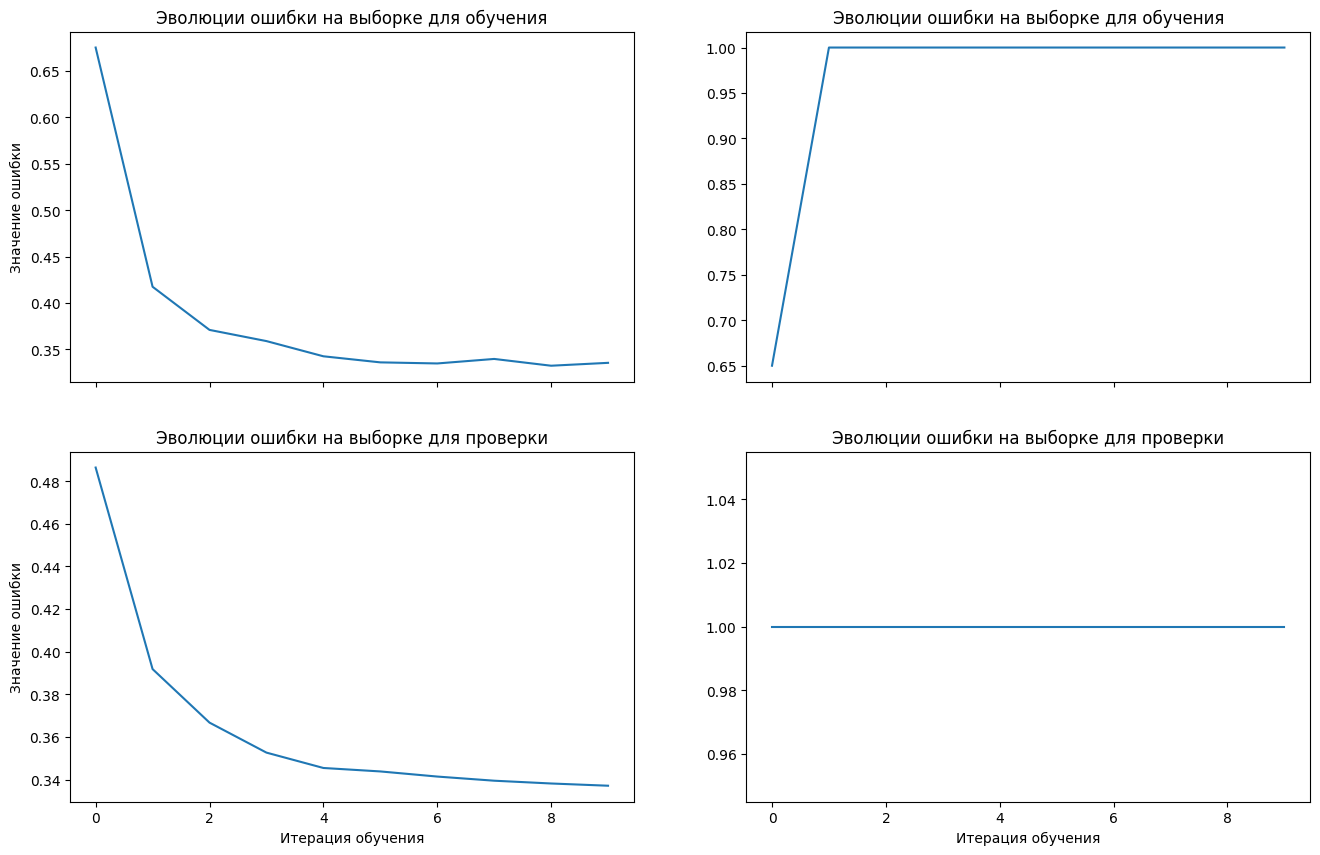

In [ ]:
fig, axs = plt.subplots(2,2, figsize=(16,10), sharex=True)
axs[0,0].plot(process['train']['loss'])
axs[0,0].title.set_text('Эволюции ошибки на выборке для обучения')
axs[0,1].plot(process['train']['accuracy'])
axs[0,1].title.set_text('Эволюции ошибки на выборке для обучения')
axs[1,0].plot(process['validate']['loss'])
axs[1,0].title.set_text('Эволюции ошибки на выборке для проверки')
axs[1,1].plot(process['validate']['accuracy'])
axs[1,1].title.set_text('Эволюции ошибки на выборке для проверки')
axs[1,0].set_xlabel('Итерация обучения')
axs[1,1].set_xlabel('Итерация обучения')
axs[0,0].set_ylabel('Значение ошибки')
axs[1,0].set_ylabel('Значение ошибки')

═══════════════════════════════════════════╣ validate  dataset ╠══════════════════════════════════════════


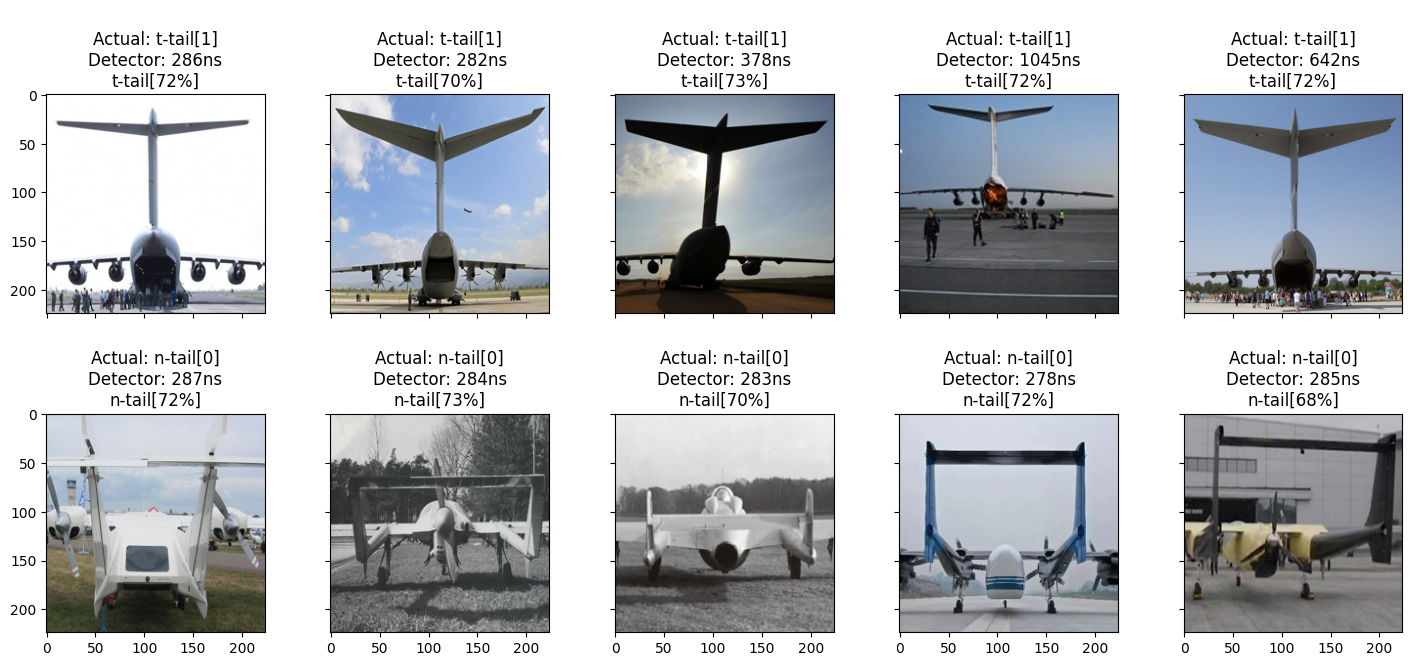

In [ ]:
  num_per_row = 5
  single_size = 3.5
  vspace = 0.3

  # print('═'*45  + '╣ Train dataset ╠' + '═'*44)
  # classify(train, denormalize(train, transform), num_per_row=num_per_row, single_size=single_size, vspace=vspace,
  #         labels = train.classes, model=tunned_model, model_labels=train.classes, debug=True  )
  print('═'*43  + '╣ Validate  dataset ╠' + '═'*42)
  classify(validate, denormalize(validate, transform), num_per_row=num_per_row, single_size=single_size, vspace=vspace,
            labels = validate.classes, model=tunned_model, model_labels=validate.classes)

##Обзор обшепринятых метрик приметильно к tunned model

###Confusion matrix

Confusion matrix (матрица ошибок) - это инструмент, используемый для оценки качества работы алгоритма классификации. Позволяет визуализировать производительность модели, показывая, какие классы были правильно или неправильно классифицированы.

Confusion matrix представляет собой таблицу, где строки представляют фактические классы, а столбцы - предсказанные классы. В каждой ячейке матрицы показано количество примеров, которые принадлежат соответствующей комбинации фактического и предсказанного классов.

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [ ]:
conf_matrix = confusion_matrix(to_labels, preds)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[5 0]
 [0 5]]


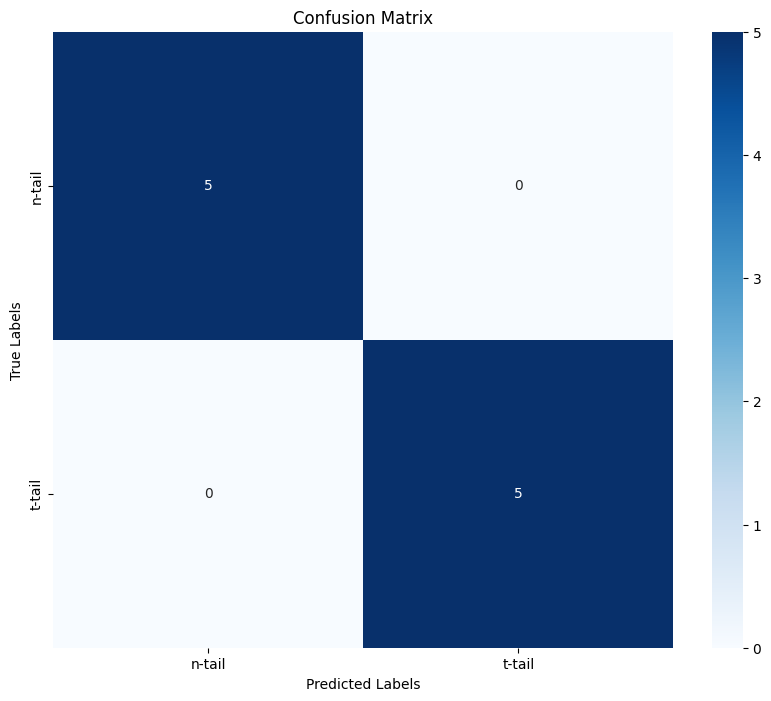

In [ ]:
#print(class_labels)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=train.classes, yticklabels=train.classes)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

###Accuracy

Одной из наиболее простых, а поэтому и распространенной метрикой является точность. Она показывает количество правильно проставленных меток класса (истинно положительных и истинно отрицательных) от общего количества данных.

In [ ]:
def accuracy(to_labels, preds):
    """
    Вычисляет метрику accuracy.

    Параметры:
    - to_labels: Настоящие метки классов.
    - preds: Предсказанные метки классов.

    Возвращает:
    - Значение метрики accuracy.
    """
    correct_predictions = sum(1 for true, pred in zip(to_labels, preds) if true == pred)
    total_samples = len(to_labels)
    accuracy_value = correct_predictions / total_samples
    return accuracy_value

In [ ]:
acc = accuracy(to_labels, preds)
print(f'Accuracy: {acc}')

Accuracy: 0.8


###Precision

Метрика precision (также точность) в контексте задачи классификации измеряет долю правильно предсказанных положительных классов относительно всех предсказанных положительных классов.

In [ ]:
def precision(to_labels, preds):
    """
    Вычисляет метрику precision.

    Параметры:
    - to_labels: Настоящие метки классов.
    - preds: Предсказанные метки классов.

    Возвращает:
    - Значение метрики precision.
    """
    true_positives = sum(1 for true, pred in zip(to_labels, preds) if true == 1 and pred == 1)
    false_positives = sum(1 for true, pred in zip(to_labels, preds) if true == 0 and pred == 1)

    if true_positives + false_positives == 0:
        return 0  # избегаем деления на ноль

    precision_value = true_positives / (true_positives + false_positives)
    return precision_value


In [ ]:
precision_value = precision(to_labels, preds)
print(f'Precision: {precision_value}')

Precision: 1.0


В виду того, что в результате получен "идеальный" случай и все 10/10 предсказаний верны, рассматривать какие-либо метрики c моделью до переобучения не имеет смысла, посколько там был достигнут результат 0/0.

Стоит также отметить, что уверенность распознавания составила 71.4%. Повысить это значение можно множеством способов: обучение на большем объеме данны; проведение экспериментов с гиперпараметрами модели, такими как learning rate, количество слоев, количество нейронов в слоях и др.; Устранение переобучения.



##Заключение

В ходе выполнения курсовой работы были рассмотрены решения задач компьютерного зрения в системах управления с использованием предобученных моделей сверточных нейронных сетей из библиотеки PyTorch: AlexNet, DenseNet, MobileNet, ResNet50 и SwinT Эксперименты проводились на наборе данных (датасете), состоящем из изображений двух классов: Т-образное оперение и П-образное оперение. Процесс работы был разделен на этапы:


1. Инициализация преднастроенных нейросетевых моделей. Изучение архитектуры, функционала, преимуществ и недостатков, а также истории создания рассматриваемых нейронных сетей;

2. Изучение возможностей предоставленного вспомогательного фунционала
  *   Функции *classify*;
  *   Функции *denormalize*;
  *   Класса *UrlDataset*;

3. Подготовка датасета для донастройки модели. Неоднократно был собран набор изображений. Изначально предполагалось значительно увеличить объем выборки и собрать изображения оперений в различных ракурсах. К сожалению, такой подход ни к чему не привел и пришлось применить другой: уменьшить объем выборки, придавая особое внимание ракурсу съемки и фону, чтобы модель могла успешно выявлять особенности объектов;

4. В последствии для собранного датасета были представленны следующие собственные метрики:
  *   Количество ответов с Т- или П-образным оперением;
  *   Количество приближенные ответов, связанные с оперением (например, самолет);
  *   Гистограмма полученных предсказаний с частотой встречаемости;
  *   Графики средней и медианной скорости классификации изображений;
  *   Графики кол-ва элементов;

5. Были рассмотрены примеры успешных и неуспешных результатов для каждой из рассматриваемых моделей. Модель SwinT показала наилучший результат по распознованию летательных средств, но вместе с тем не справилась c тем, чтобы распознать оперение и тем более его тип;

6. Следующим этапом стало проведение замены выходного слоя модели SwinT на два выхода с линейным классификатором для задачи различения двух классов объектов. Полученные результаты оказались удовлетворительными. Для валидационной выборки из 10 изображений все 10 предсказаны верно, уверенность распознавания в среднем составила 71.4%. Существует множество способов для увеличения этого значения, но не все они рассматриваются в рамках выполняемой работы:
  *   Обучение на большем объеме данны;
  *   Проведение экспериментов с гиперпараметрами модели:
    *   Learning rate;
    *   Количество слоев;
    *   Количество нейронов в слоях;
  *   Устранение переобучения.

В завершение хотелось бы отметить, что выбор предобученной модели зависит от конкретной задачи, которую необходимо решить, и типа данных, с которыми придется работать. Совсем не обязательно, чтобы это была модель *swinT*.

